## Train, Test or Retrain multiple models 

In [ ]:
from Model_Trainer import test_trained_models, run_multiple_models
from Utils import plot_all_results
from  Models_1D import TCNModel_withBase
from Dataset_torch import EEGDataset_with_filters

models = [TCNModel_withBase,]

shared_parameters_ssvep = {
    "data_path": "datasets/numpy/ssvep_4_nofilter_GMCGA_no01_4labels_250hz_1.5_window_size.npz",   # no weights 
    # "data_path": "datasets/numpy/ssvep_5_nofilter_GMCGA_no1_5labels_250hz_1.5_window_size_0.4keepratio.npz",   # weights 0.5
    # "data_path": "datasets/numpy/ssvep_10_nofilter_GMCGAGG_10labels_250hz_1.5_window_size.npz",  # no weights, lets try to retrain with weights on 4 and 8
    
    "DATASET_CLASS": EEGDataset_with_filters,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": slice(0, 8), 
    
    "MAX_TIME": "00:00:00:30",
    "MODEL_KWARGS": {
        "in_channels": 8, 
        
        "num_classes": 4,
        "class_labels": [10.5, 12, 15.2, 18.1],
        "class_weights": [1.0, 1.0, 1.0, 1.0],
        
        # "num_classes": 5,
        # "class_labels": [0, 10.5, 12, 15.2, 18.1],
        # "class_weights": [0.5, 1.0, 1.0, 1.0, 1.0], 
        
        # "num_classes": 10,
        # "class_labels": [5, 7, 8.6, 10.5, 11, 12, 13.4, 15.2, 17, 18.1],
        # "class_weights": [1.0, 1.0, 1.5, 1.0, 1.5, 1.0, 1.0, 1.0, 1.5, 1.0], 
    },
    
    # "skip_training": True,
    
    # "LOAD_CHECKPOINT": "logs/TCNModel_withBase/version_12_4_best_1h_GMCGA_no01_4labels/checkpoints/best-11408-val_acc=0.948.ckpt", # best 4 label model before retraining
    "LOAD_CHECKPOINT": "logs/TCNModel_withBase/version_44_4_retrained_best/checkpoints/best-00-val_acc=0.953.ckpt",              # best 4 label model after retraining

    # "LOAD_CHECKPOINT": "logs/TCNModel_withBase/version_41_5_retrained_best/checkpoints/best-00-val_acc=0.813.ckpt", # best 5 label model
    
    # "LOAD_CHECKPOINT": "logs/TCNModel_withBase/version_52_10_most_balanced_and_best/checkpoints/best-4880-val_acc=0.886.ckpt",   # most balanced and best label 10
}
results, test_loader = run_multiple_models(models, shared_parameters_ssvep)

In [ ]:
test_results = test_trained_models(results, test_loader)
plot_all_results(results, test_results)

## Train TCN Variants

Loading data from: datasets/numpy/ssvep_4_nofilter_GMCGA_no01_4labels_250hz_1.5_window_size.npz
Data loaded: X=(1576, 8, 375), y=(1576,)


Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Dataset split: Train=1103, Val=236, Test=237
Dataloaders ready

Processing  TCNModel_v1_outch64_GELU_d_repeated...

Training TCNModel_v1_outch64_GELU_d_repeated...



You are using a CUDA device ('NVIDIA GeForce RTX 3060') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type                      | Params | Mode 
----------------------------------------------------------------
0 | train_acc | MulticlassAccuracy        | 0      | train
1 | val_acc   | MulticlassAccuracy        | 0      | train
2 | test_acc  | MulticlassAccuracy        | 0      | train
3 | test_cm   | MulticlassConfusionMatrix | 0      | train
4 | tcn       | Sequential                | 64.1 K | train
5 | head      | Linear                    | 260    | train
----------------------------------------------------------------
64.4 K    Trainable params
0         Non-trainable

Best model saved at: logs/TCNModel_v1_outch64_GELU_d_repeated/version_0/checkpoints/best-22-val_acc=0.691.ckpt
Class 10.5 accuracy: 0.828
Class 12 accuracy: 0.516
Class 15.2 accuracy: 0.860
Class 18.1 accuracy: 0.466


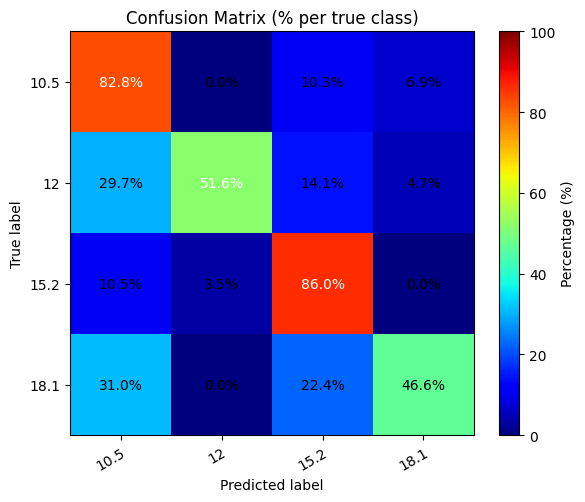

TCNModel_v1_outch64_GELU_d_repeated: Test accuracy = 0.662

Plotting TCNModel_v1_outch64_GELU_d_repeated: Test Accuracy = 0.662


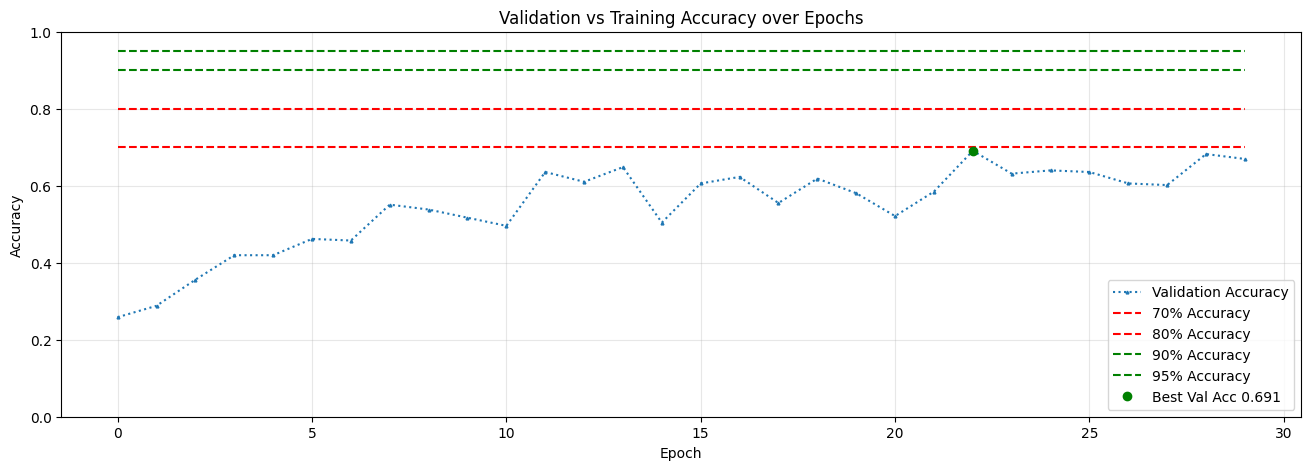

Using 16bit Automatic Mixed Precision (AMP)



Processing  TCNModel_v1_outch64_GELU_head1...



GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type                      | Params | Mode 
----------------------------------------------------------------
0 | train_acc | MulticlassAccuracy        | 0      | train
1 | val_acc   | MulticlassAccuracy        | 0      | train
2 | test_acc  | MulticlassAccuracy        | 0      | train
3 | test_cm   | MulticlassConfusionMatrix | 0      | train
4 | tcn       | Sequential                | 39.2 K | train
5 | head      | Sequential                | 4.4 K  | train
----------------------------------------------------------------
43.6 K    Trainable params
0         Non-trainable params
43.6 K    Total params
0.174     Total estimated model params size (MB)
22        Modules in train mode
0         Modules in eval mode


Training TCNModel_v1_outch64_GELU_head1...



Time limit reached. Elapsed time is 0:00:10. Signaling Trainer to stop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Best model saved at: logs/TCNModel_v1_outch64_GELU_head1/version_0/checkpoints/best-23-val_acc=0.644.ckpt
Class 10.5 accuracy: 0.828
Class 12 accuracy: 0.516
Class 15.2 accuracy: 0.649
Class 18.1 accuracy: 0.466


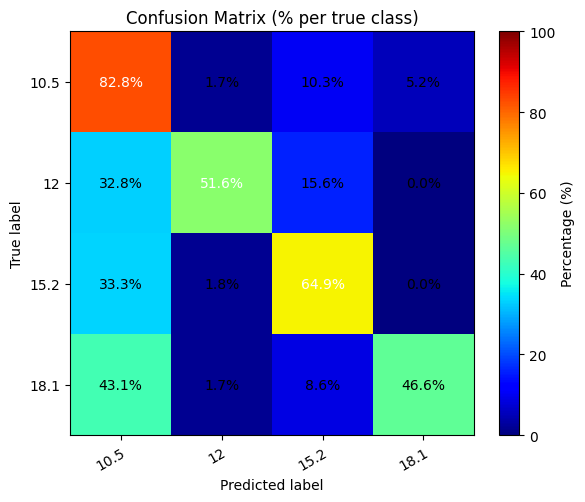

TCNModel_v1_outch64_GELU_head1: Test accuracy = 0.612

Plotting TCNModel_v1_outch64_GELU_d_repeated: Test Accuracy = 0.612


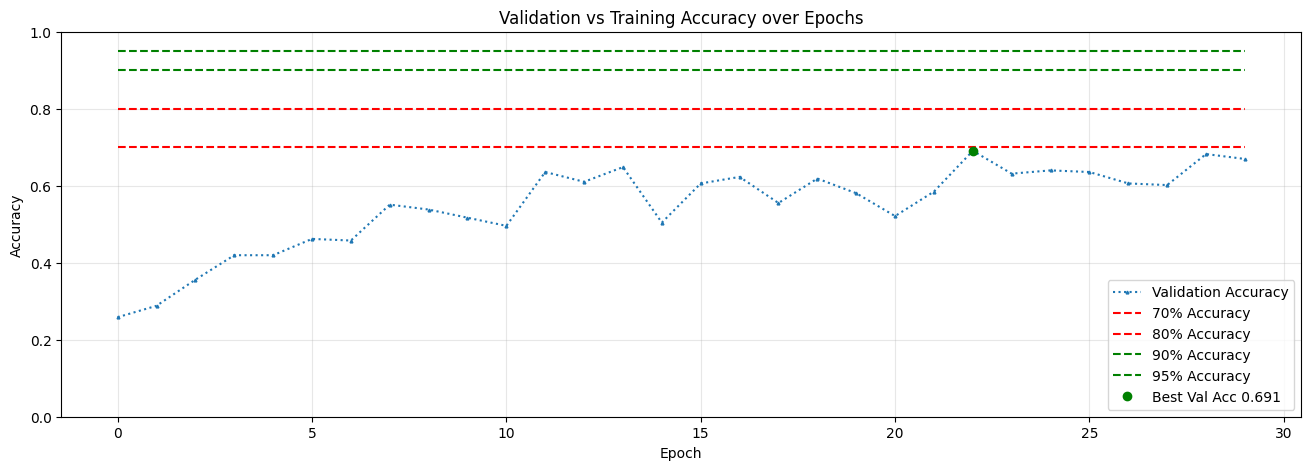


Plotting TCNModel_v1_outch64_GELU_head1: Test Accuracy = 0.612


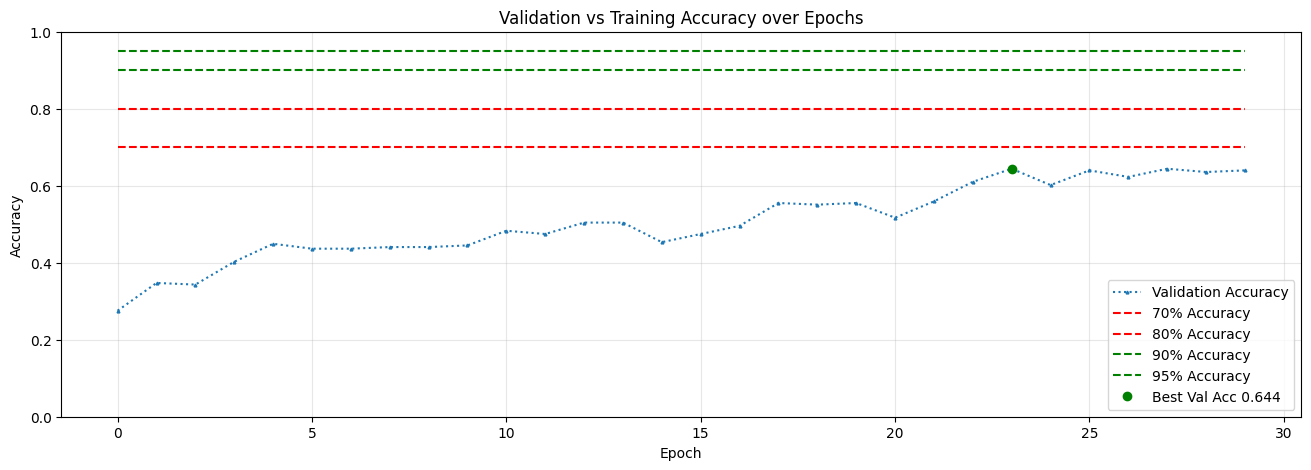

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Processing  TCNModel_v1_outch64_GELU_head2...

Training TCNModel_v1_outch64_GELU_head2...



LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type                      | Params | Mode 
----------------------------------------------------------------
0 | train_acc | MulticlassAccuracy        | 0      | train
1 | val_acc   | MulticlassAccuracy        | 0      | train
2 | test_acc  | MulticlassAccuracy        | 0      | train
3 | test_cm   | MulticlassConfusionMatrix | 0      | train
4 | tcn       | Sequential                | 39.2 K | train
5 | head      | Sequential                | 4.5 K  | train
----------------------------------------------------------------
43.7 K    Trainable params
0         Non-trainable params
43.7 K    Total params
0.175     Total estimated model params size (MB)
22        Modules in train mode
0         Modules in eval mode
Time limit reached. Elapsed time is 0:00:10. Signaling Trainer to stop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Best model saved at: logs/TCNModel_v1_outch64_GELU_head2/version_0/checkpoints/best-31-val_acc=0.674.ckpt
Class 10.5 accuracy: 0.810
Class 12 accuracy: 0.547
Class 15.2 accuracy: 0.737
Class 18.1 accuracy: 0.483


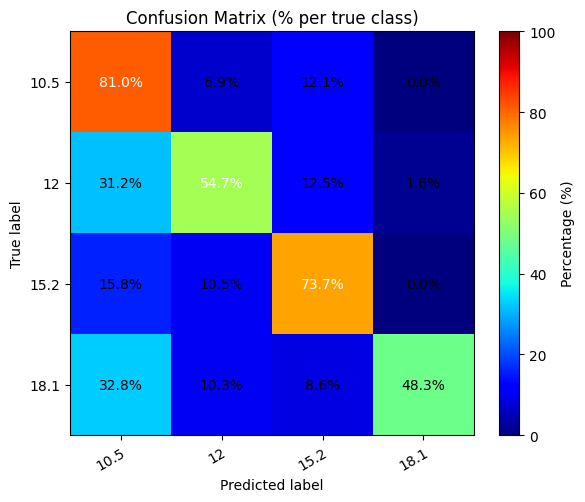

TCNModel_v1_outch64_GELU_head2: Test accuracy = 0.641

Plotting TCNModel_v1_outch64_GELU_d_repeated: Test Accuracy = 0.641


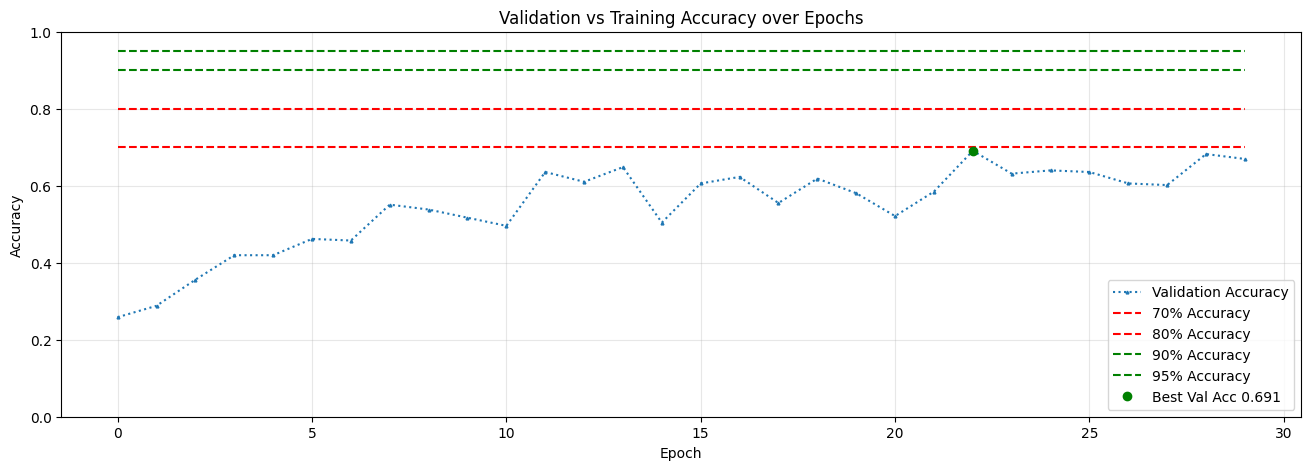


Plotting TCNModel_v1_outch64_GELU_head1: Test Accuracy = 0.641


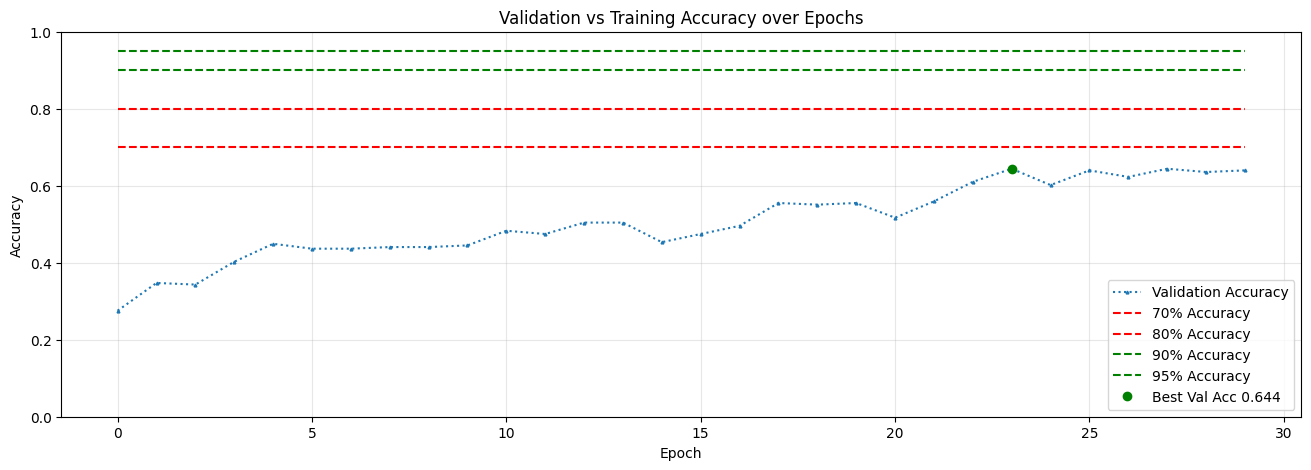


Plotting TCNModel_v1_outch64_GELU_head2: Test Accuracy = 0.641


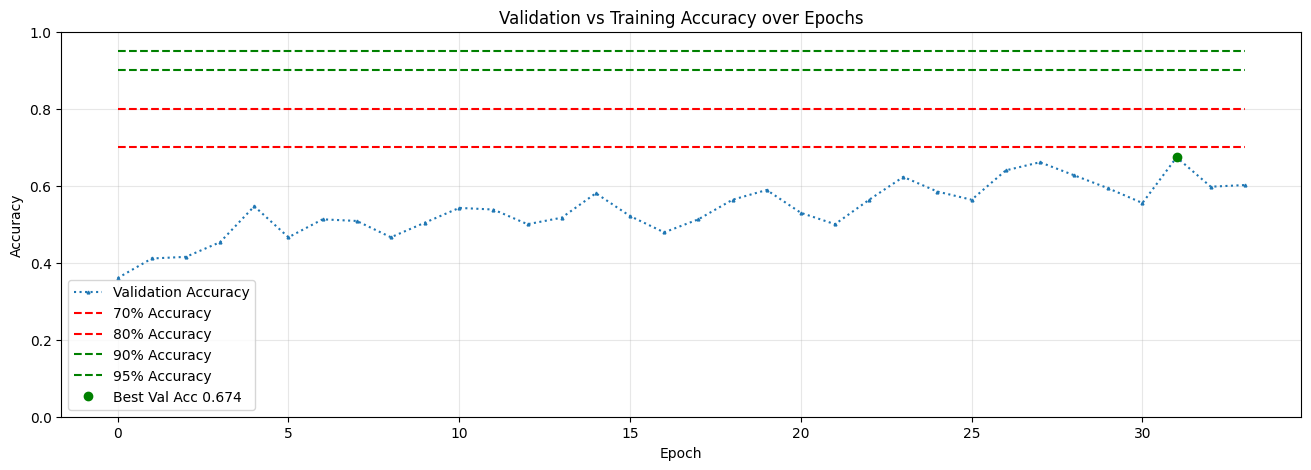

Using 16bit Automatic Mixed Precision (AMP)



Processing  TCNModel_v1_outch64_GELU_pool1...



GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type                      | Params | Mode 
----------------------------------------------------------------
0 | train_acc | MulticlassAccuracy        | 0      | train
1 | val_acc   | MulticlassAccuracy        | 0      | train
2 | test_acc  | MulticlassAccuracy        | 0      | train
3 | test_cm   | MulticlassConfusionMatrix | 0      | train
4 | tcn       | Sequential                | 39.2 K | train
5 | head      | Linear                    | 260    | train
----------------------------------------------------------------
39.4 K    Trainable params
0         Non-trainable params
39.4 K    Total params
0.158     Total estimated model params size (MB)
18        Modules in train mode
0         Modules in eval mode


Training TCNModel_v1_outch64_GELU_pool1...



Time limit reached. Elapsed time is 0:00:10. Signaling Trainer to stop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Best model saved at: logs/TCNModel_v1_outch64_GELU_pool1/version_0/checkpoints/best-27-val_acc=0.691.ckpt
Class 10.5 accuracy: 0.810
Class 12 accuracy: 0.484
Class 15.2 accuracy: 0.877
Class 18.1 accuracy: 0.448


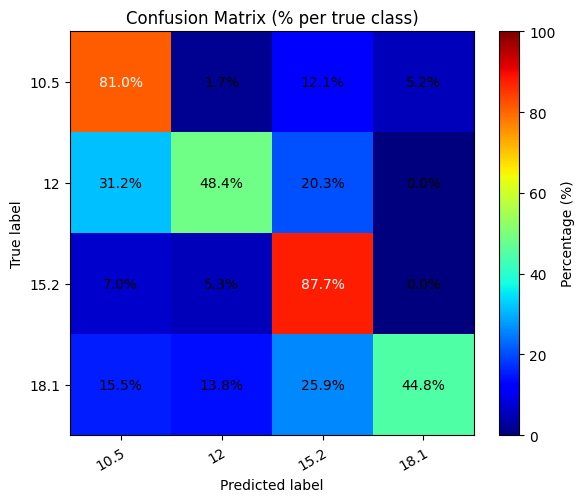

TCNModel_v1_outch64_GELU_pool1: Test accuracy = 0.650

Plotting TCNModel_v1_outch64_GELU_d_repeated: Test Accuracy = 0.650


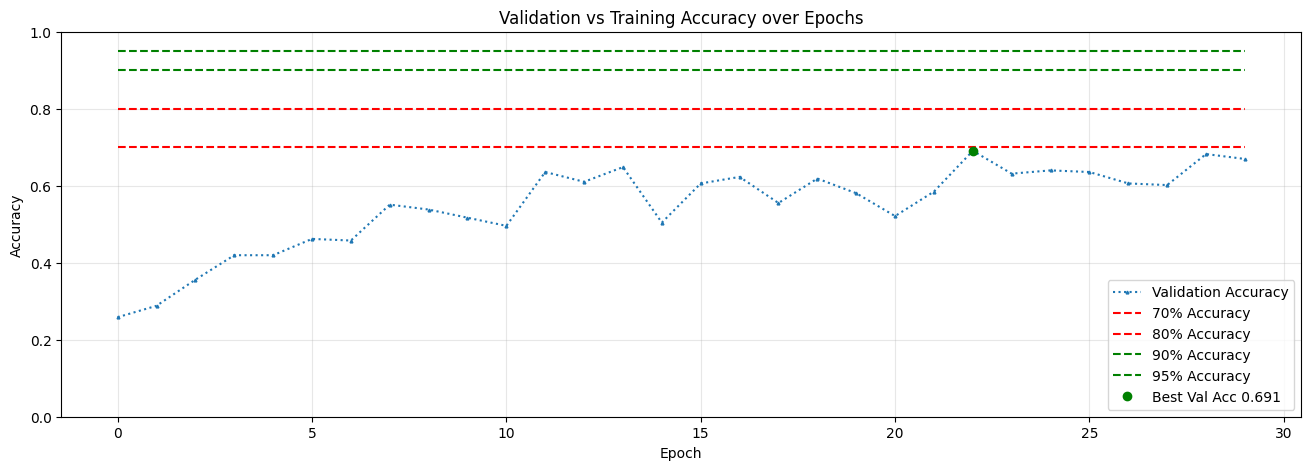


Plotting TCNModel_v1_outch64_GELU_head1: Test Accuracy = 0.650


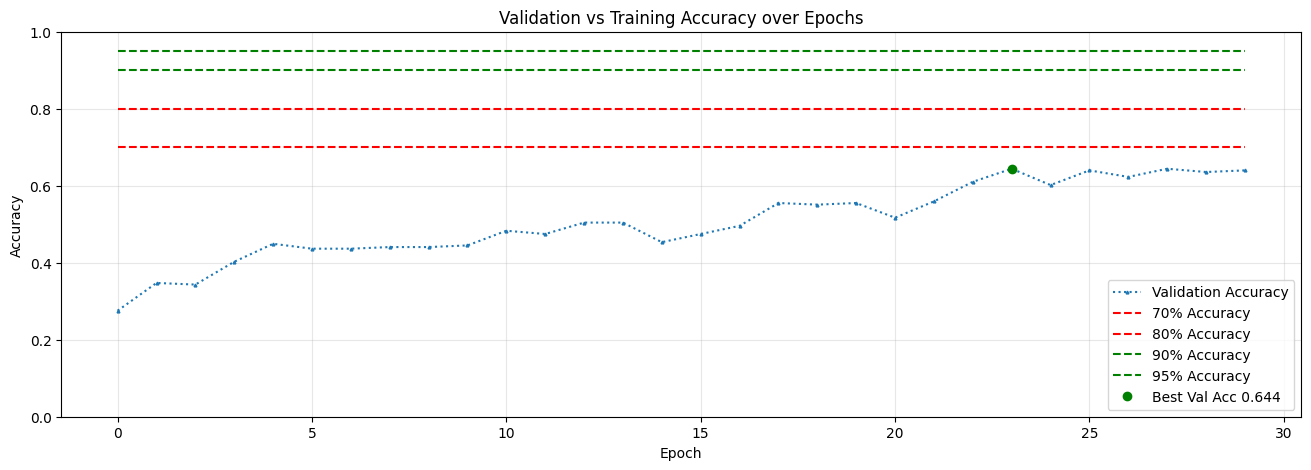


Plotting TCNModel_v1_outch64_GELU_head2: Test Accuracy = 0.650


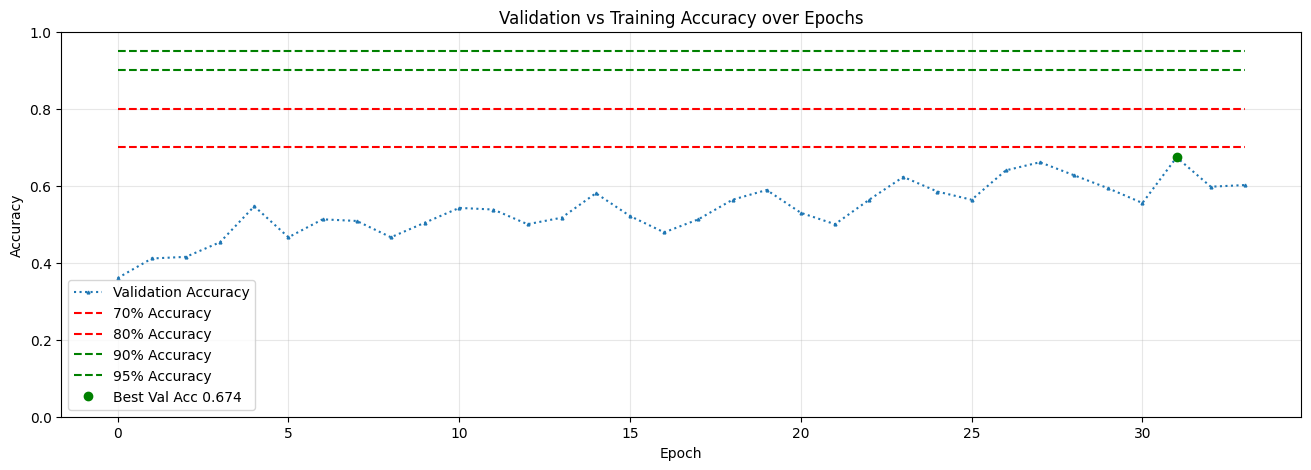


Plotting TCNModel_v1_outch64_GELU_pool1: Test Accuracy = 0.650


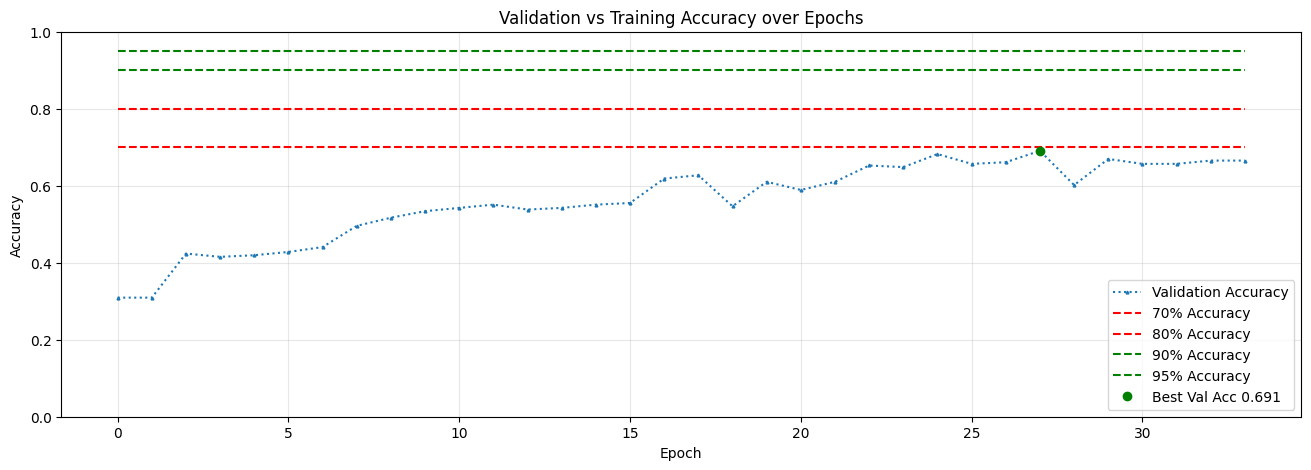

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Processing  TCNModel_v1_outch64_GELU_pool2...

Training TCNModel_v1_outch64_GELU_pool2...



LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type                      | Params | Mode 
----------------------------------------------------------------
0 | train_acc | MulticlassAccuracy        | 0      | train
1 | val_acc   | MulticlassAccuracy        | 0      | train
2 | test_acc  | MulticlassAccuracy        | 0      | train
3 | test_cm   | MulticlassConfusionMatrix | 0      | train
4 | tcn       | Sequential                | 39.2 K | train
5 | head      | Linear                    | 260    | train
----------------------------------------------------------------
39.4 K    Trainable params
0         Non-trainable params
39.4 K    Total params
0.158     Total estimated model params size (MB)
18        Modules in train mode
0         Modules in eval mode
Time limit reached. Elapsed time is 0:00:10. Signaling Trainer to stop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Best model saved at: logs/TCNModel_v1_outch64_GELU_pool2/version_0/checkpoints/best-17-val_acc=0.653.ckpt
Class 10.5 accuracy: 0.810
Class 12 accuracy: 0.578
Class 15.2 accuracy: 0.614
Class 18.1 accuracy: 0.466


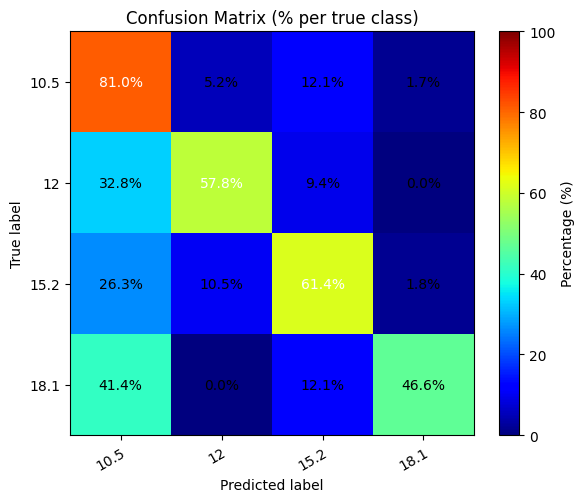

TCNModel_v1_outch64_GELU_pool2: Test accuracy = 0.616

Plotting TCNModel_v1_outch64_GELU_d_repeated: Test Accuracy = 0.616


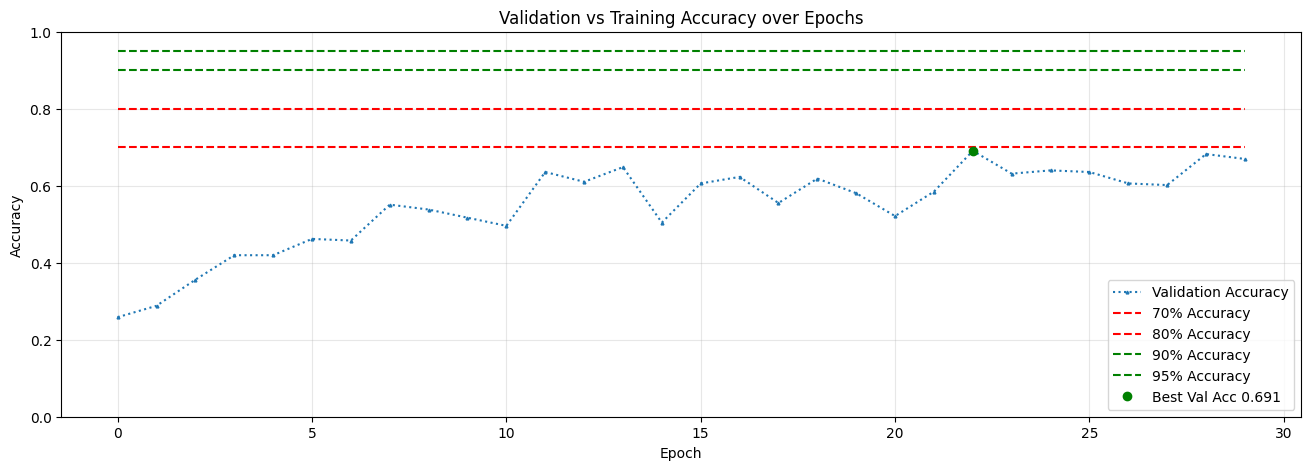


Plotting TCNModel_v1_outch64_GELU_head1: Test Accuracy = 0.616


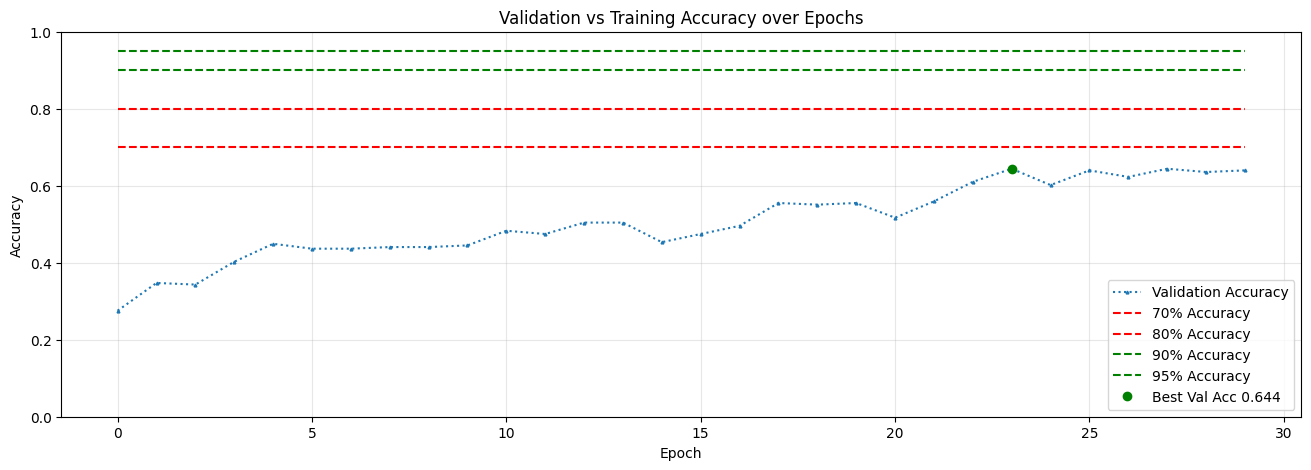


Plotting TCNModel_v1_outch64_GELU_head2: Test Accuracy = 0.616


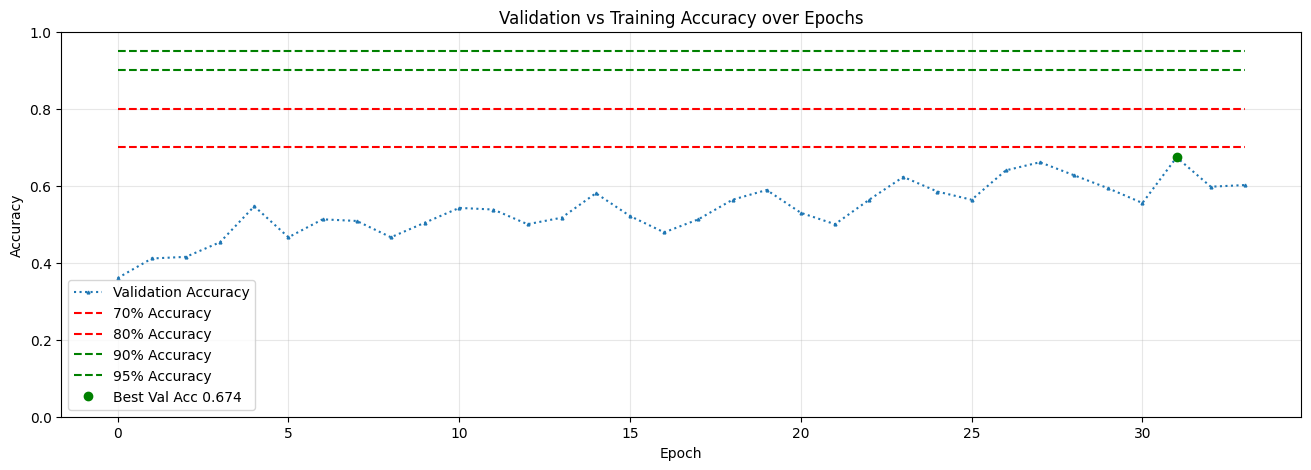


Plotting TCNModel_v1_outch64_GELU_pool1: Test Accuracy = 0.616


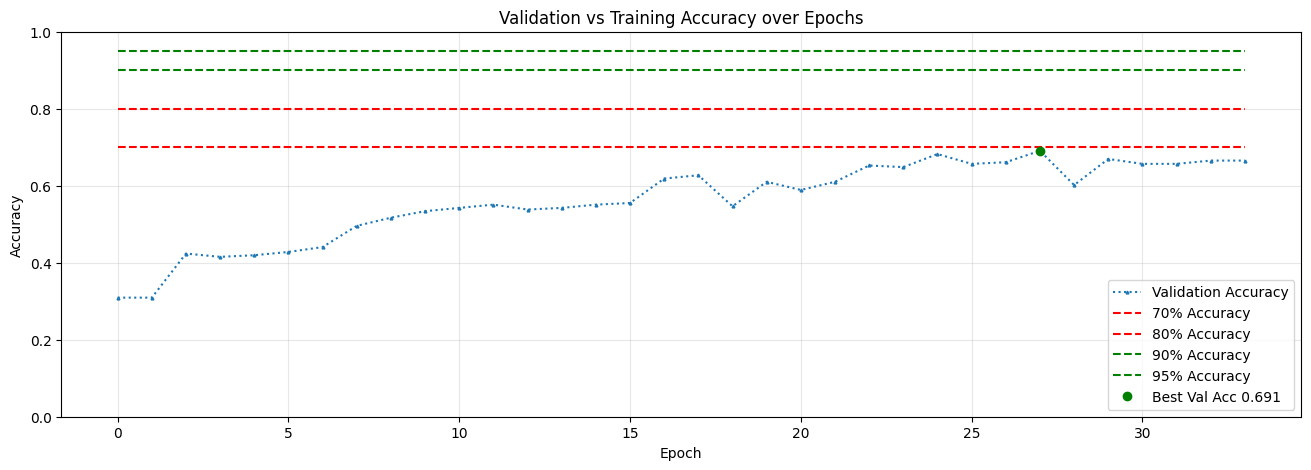


Plotting TCNModel_v1_outch64_GELU_pool2: Test Accuracy = 0.616


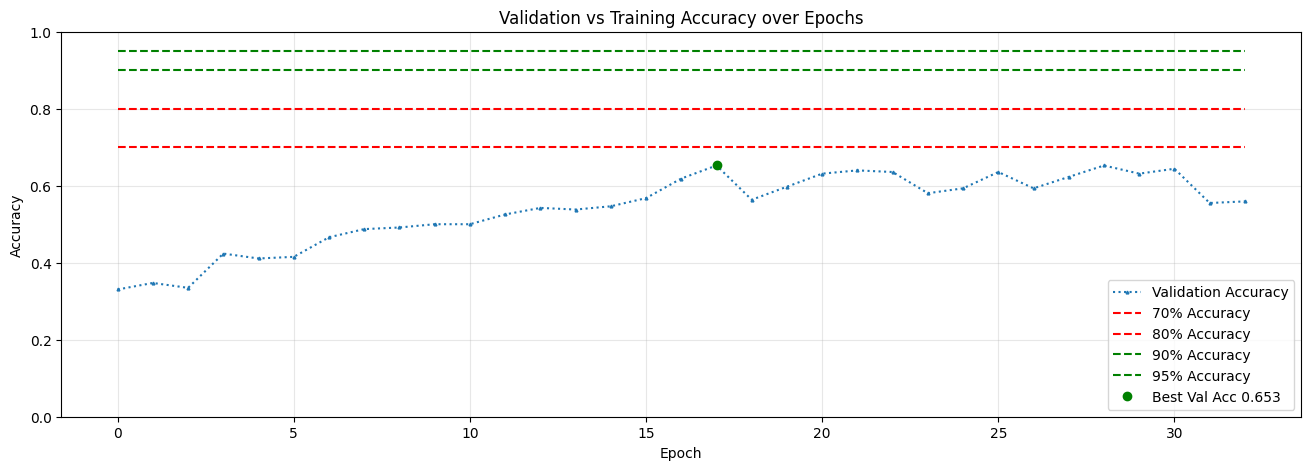

Using 16bit Automatic Mixed Precision (AMP)



Processing  TCNModel_v1_outch64_GELU_pool3...



GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type                      | Params | Mode 
----------------------------------------------------------------
0 | train_acc | MulticlassAccuracy        | 0      | train
1 | val_acc   | MulticlassAccuracy        | 0      | train
2 | test_acc  | MulticlassAccuracy        | 0      | train
3 | test_cm   | MulticlassConfusionMatrix | 0      | train
4 | tcn       | Sequential                | 39.2 K | train
5 | head      | Linear                    | 260    | train
----------------------------------------------------------------
39.4 K    Trainable params
0         Non-trainable params
39.4 K    Total params
0.158     Total estimated model params size (MB)
18        Modules in train mode
0         Modules in eval mode


Training TCNModel_v1_outch64_GELU_pool3...



Time limit reached. Elapsed time is 0:00:10. Signaling Trainer to stop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Best model saved at: logs/TCNModel_v1_outch64_GELU_pool3/version_0/checkpoints/best-31-val_acc=0.661.ckpt
Class 10.5 accuracy: 0.776
Class 12 accuracy: 0.641
Class 15.2 accuracy: 0.649
Class 18.1 accuracy: 0.466


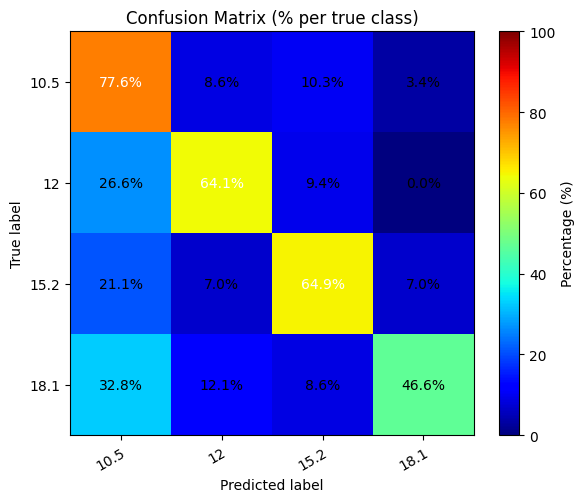

TCNModel_v1_outch64_GELU_pool3: Test accuracy = 0.633

Plotting TCNModel_v1_outch64_GELU_d_repeated: Test Accuracy = 0.633


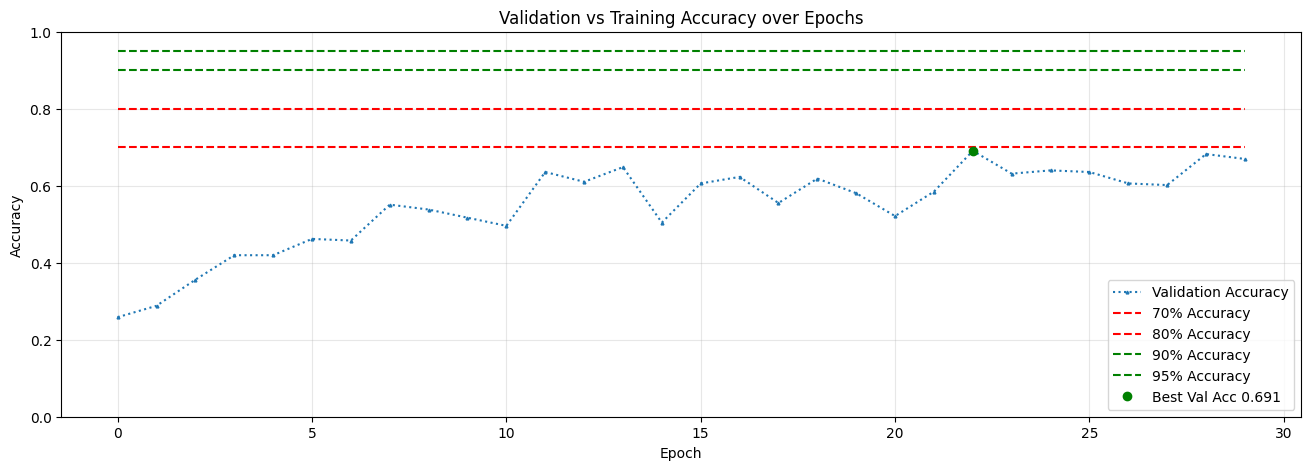


Plotting TCNModel_v1_outch64_GELU_head1: Test Accuracy = 0.633


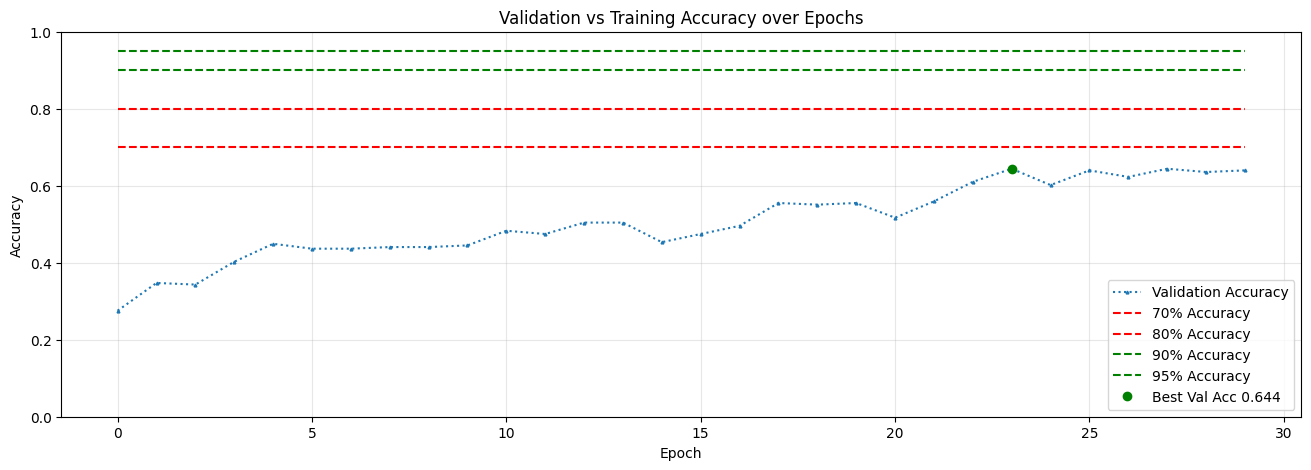


Plotting TCNModel_v1_outch64_GELU_head2: Test Accuracy = 0.633


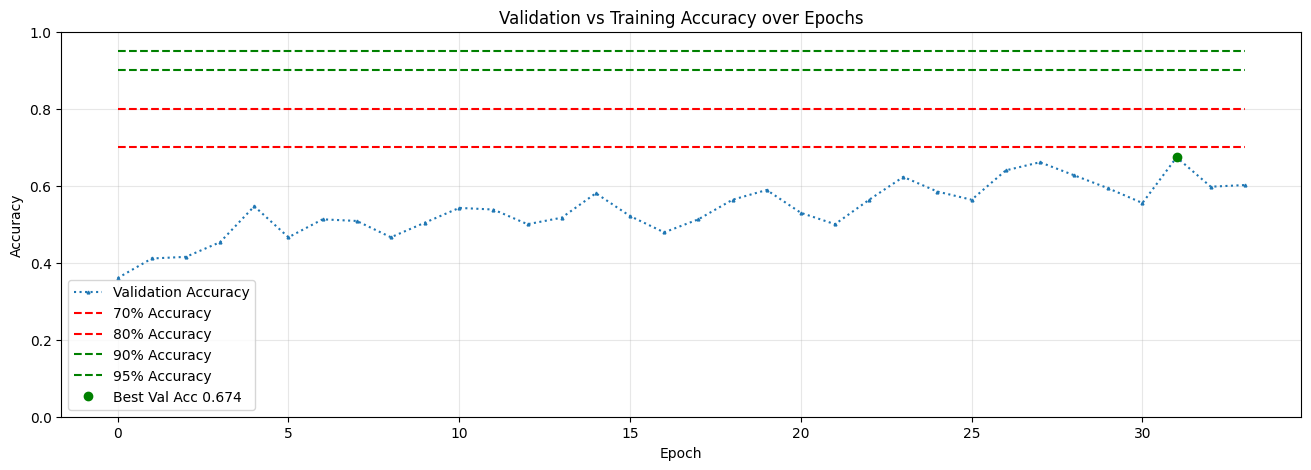


Plotting TCNModel_v1_outch64_GELU_pool1: Test Accuracy = 0.633


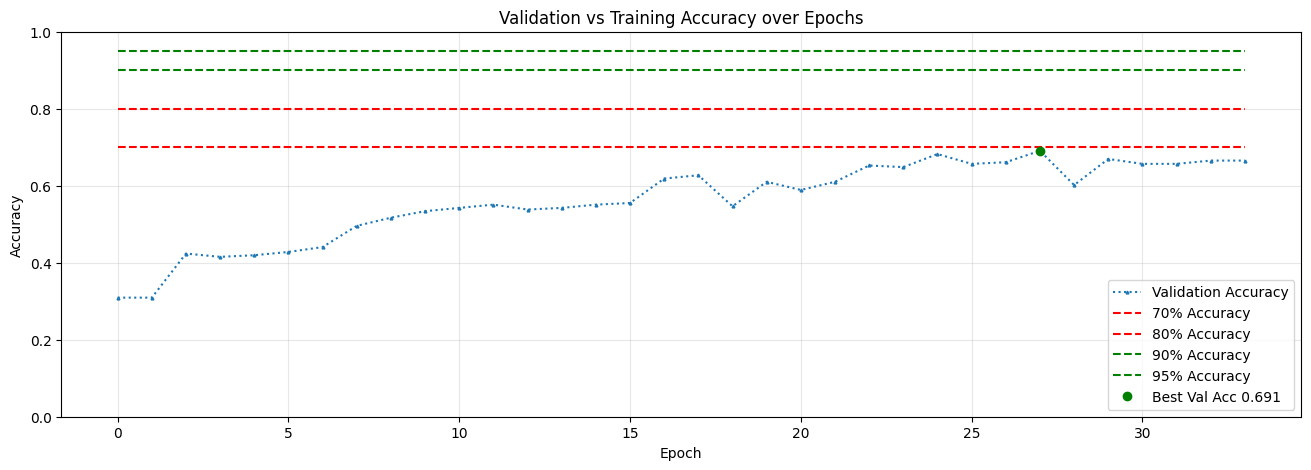


Plotting TCNModel_v1_outch64_GELU_pool2: Test Accuracy = 0.633


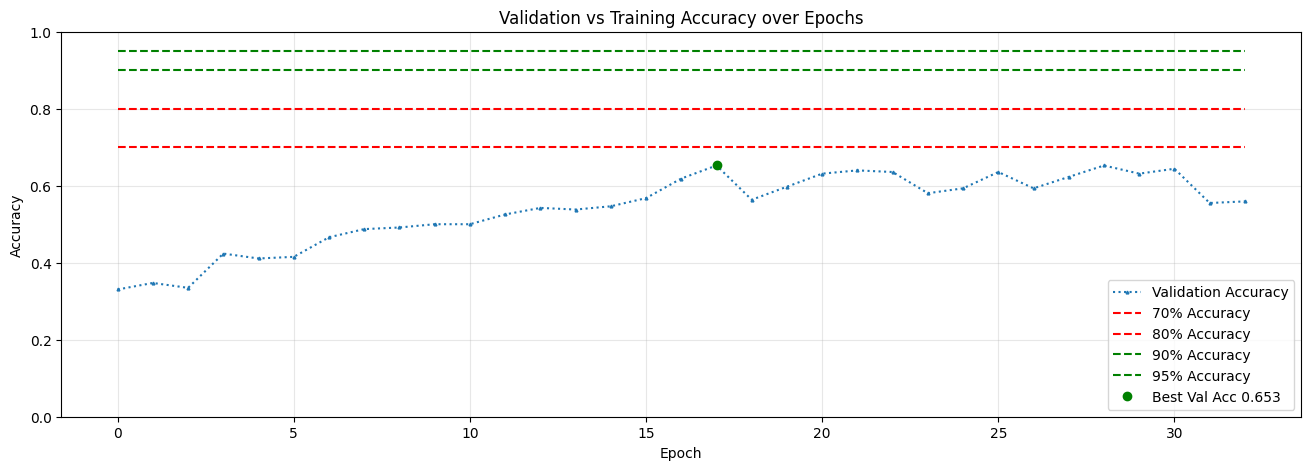


Plotting TCNModel_v1_outch64_GELU_pool3: Test Accuracy = 0.633


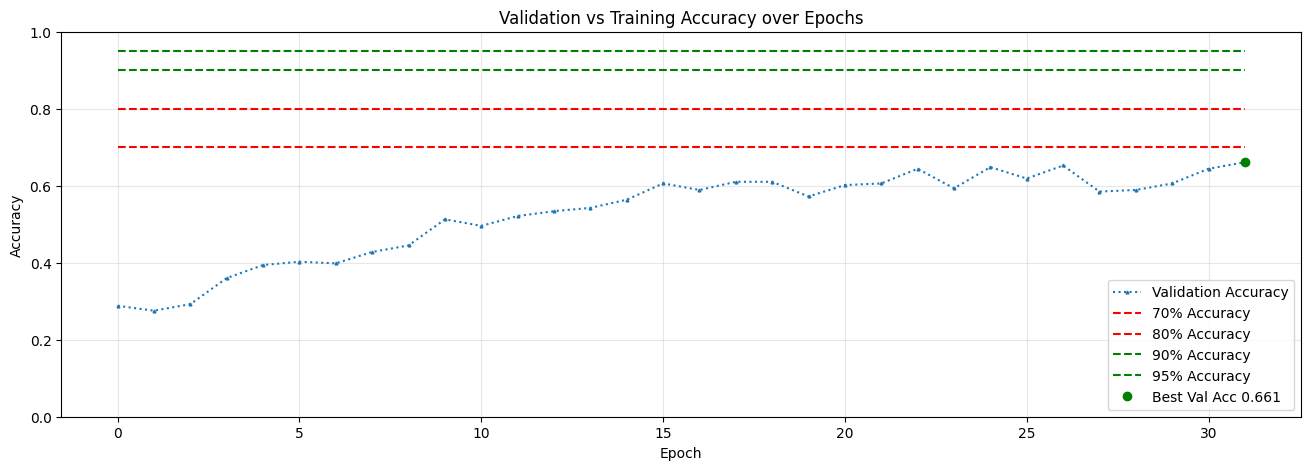


All models processed successfully!



In [ ]:
from Model_Trainer import test_trained_models, run_multiple_models
from Utils import plot_all_results
from  Models_1D import TCNModel_withBase
from Dataset_torch import EEGDataset_with_filters
# models = [TCNModel_withBase,]

from Random_models import (TCNModel_v0, TCNModel_v1, 
                           TCNModel_v1_d16, TCNModel_v1_d32, TCNModel_v1_d_repeat, TCNModel_v1_d_aggressive,
                           TCNModel_v1_k4, TCNModel_v1_k5,
                           TCNModel_v1_SiLU, TCNModel_v1_LeakyReLU, TCNModel_v1_ELU, TCNModel_v1_GELU,
                           TCNModel_v1_outch64_GELU, TCNModel_v1_outch128_GELU,
                           TCNModel_d32_outch64_GELU, TCNModel_d32_outch128_GELU,
                          TCNModel_v1_outch64_LeakyReLU,
                          TCNModel_v1_outch64_ReLU,
                          TCNModel_d32_outch64_LeakyReLU,
                          TCNModel_d32_outch64_ReLU,
                          
                          TCNModel_v1_outch64_GELU_d_repeated,
                          TCNModel_v1_outch64_GELU_head1,
                          TCNModel_v1_outch64_GELU_head2,

                          TCNModel_v1_outch64_GELU_pool1,
                          TCNModel_v1_outch64_GELU_pool2,
                          TCNModel_v1_outch64_GELU_pool3,
                          )

# list of TCN model variants for experimentation
models = [
        #   TCNModel_v0, 
          # TCNModel_v1, 
          
        #   TCNModel_v1_d16, 
        #  TCNModel_v1_d32, 
          # TCNModel_v1_d_repeat, TCNModel_v1_d_aggressive,
          # TCNModel_v1_k4, TCNModel_v1_k5,
          # TCNModel_v1_SiLU, TCNModel_v1_LeakyReLU, TCNModel_v1_ELU, TCNModel_v1_GELU,
          # TCNModel_v1_outch64, 
          # TCNModel_v1_outch128,
          # TCNModel_d32_outch64,
          # TCNModel_d32_outch128,
            # TCNModel_v1_outch64_LeakyReLU,
          # TCNModel_v1_outch64_ReLU,
            # TCNModel_d32_outch64_LeakyReLU,
          # TCNModel_d32_outch64_ReLU,
          
          TCNModel_v1_outch64_GELU_d_repeated,
          TCNModel_v1_outch64_GELU_head1,
          TCNModel_v1_outch64_GELU_head2,

          TCNModel_v1_outch64_GELU_pool1,
          TCNModel_v1_outch64_GELU_pool2,
          TCNModel_v1_outch64_GELU_pool3,
]


shared_parameters_ssvep = {
    "data_path": "datasets/numpy/ssvep_4_nofilter_GMCGA_no01_4labels_250hz_1.5_window_size.npz",
    
    "DATASET_CLASS": EEGDataset_with_filters,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": slice(0, 8), 
    
    "MAX_TIME": "00:00:10:00",
    "MODEL_KWARGS": {
        "in_channels": 8, 
        
        "num_classes": 4,
        "class_labels": [10.5, 12, 15.2, 18.1],
        "class_weights": [1.0, 1.0, 1.0, 1.0],
    },
  
    # "skip_training": True,
    # "LOAD_CHECKPOINT": "logs/TCNModel_v1_d32/version_2_932/checkpoints/best-1807-val_acc=0.898.ckpt",              # best 4 label model after retraining
}
results, test_loader = run_multiple_models(models, shared_parameters_ssvep)

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Testing TCNModel_v1_outch64...


Testing: |          | 0/? [00:00<?, ?it/s]

Class 10.5 accuracy: 0.983
Class 12 accuracy: 0.922
Class 15.2 accuracy: 0.965
Class 18.1 accuracy: 0.914


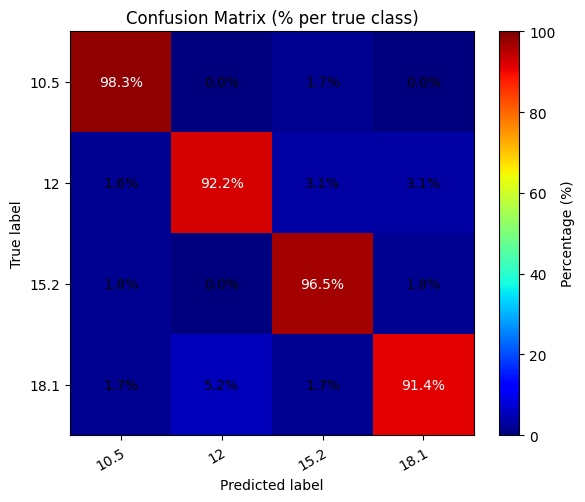

TCNModel_v1_outch64: Test accuracy = 0.945


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Testing TCNModel_v1_outch128...


Testing: |          | 0/? [00:00<?, ?it/s]

Class 10.5 accuracy: 0.983
Class 12 accuracy: 0.938
Class 15.2 accuracy: 0.895
Class 18.1 accuracy: 0.897


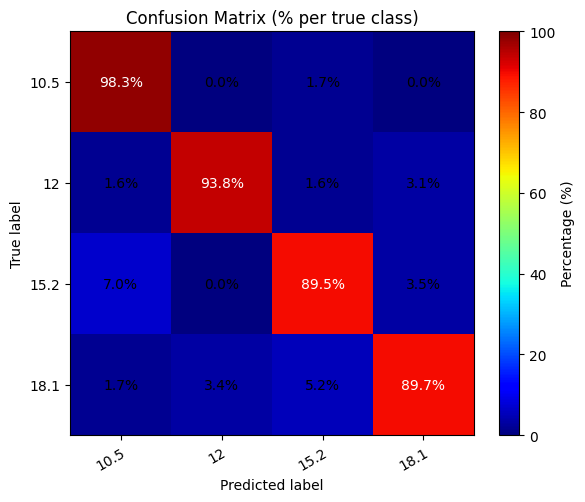

TCNModel_v1_outch128: Test accuracy = 0.928


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Testing TCNModel_d32_outch64...


Testing: |          | 0/? [00:00<?, ?it/s]

Class 10.5 accuracy: 0.948
Class 12 accuracy: 0.875
Class 15.2 accuracy: 0.877
Class 18.1 accuracy: 0.931


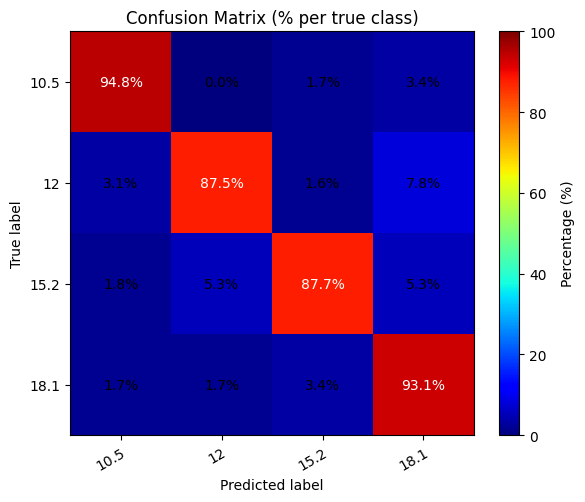

TCNModel_d32_outch64: Test accuracy = 0.907


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Testing TCNModel_d32_outch128...


Testing: |          | 0/? [00:00<?, ?it/s]

Class 10.5 accuracy: 0.931
Class 12 accuracy: 0.797
Class 15.2 accuracy: 0.947
Class 18.1 accuracy: 0.966


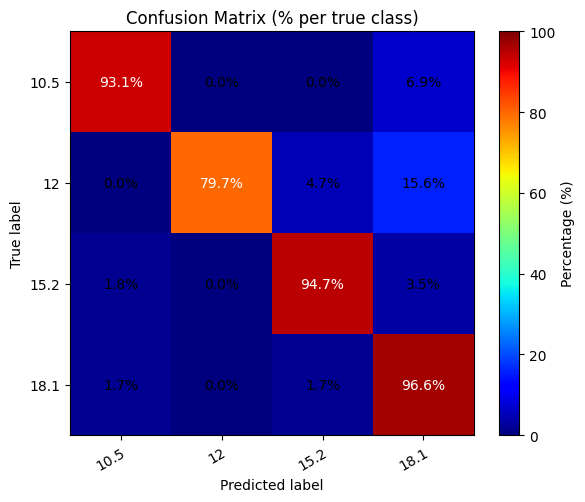

TCNModel_d32_outch128: Test accuracy = 0.907

Testing complete for all models.


Plotting TCNModel_v1_outch64: Test Accuracy = 0.945


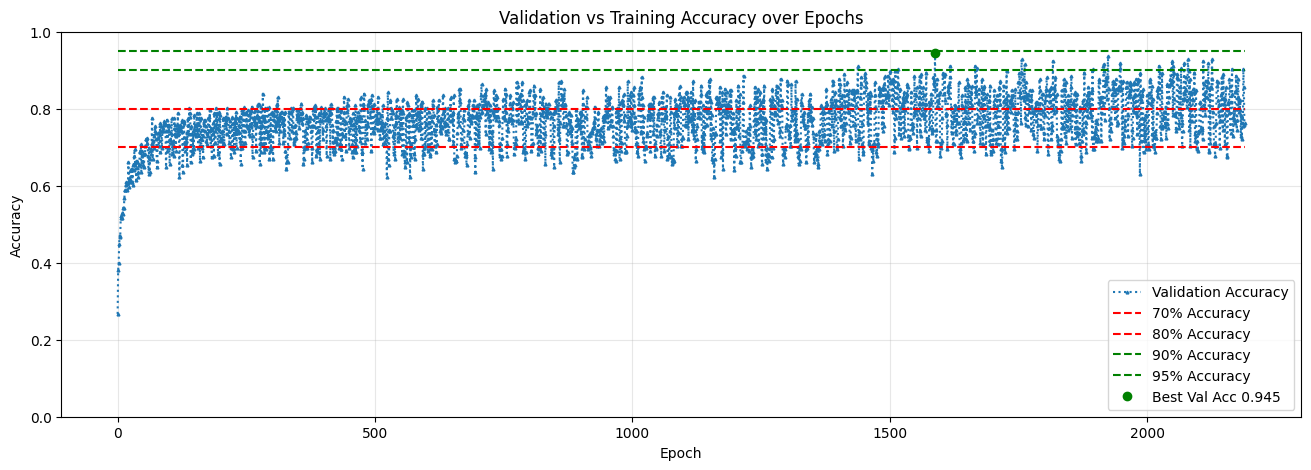


Plotting TCNModel_v1_outch128: Test Accuracy = 0.928


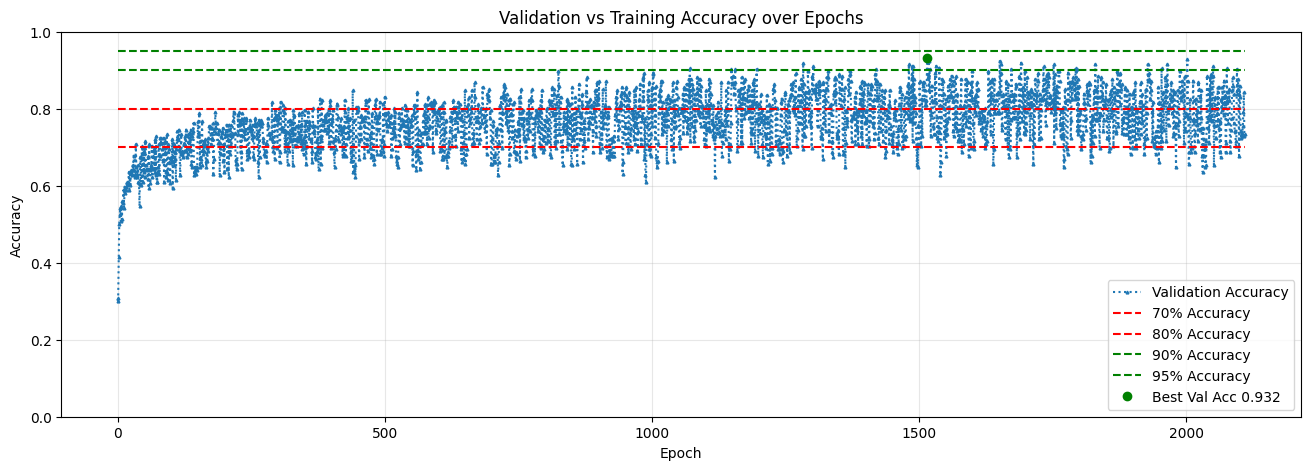


Plotting TCNModel_d32_outch64: Test Accuracy = 0.907


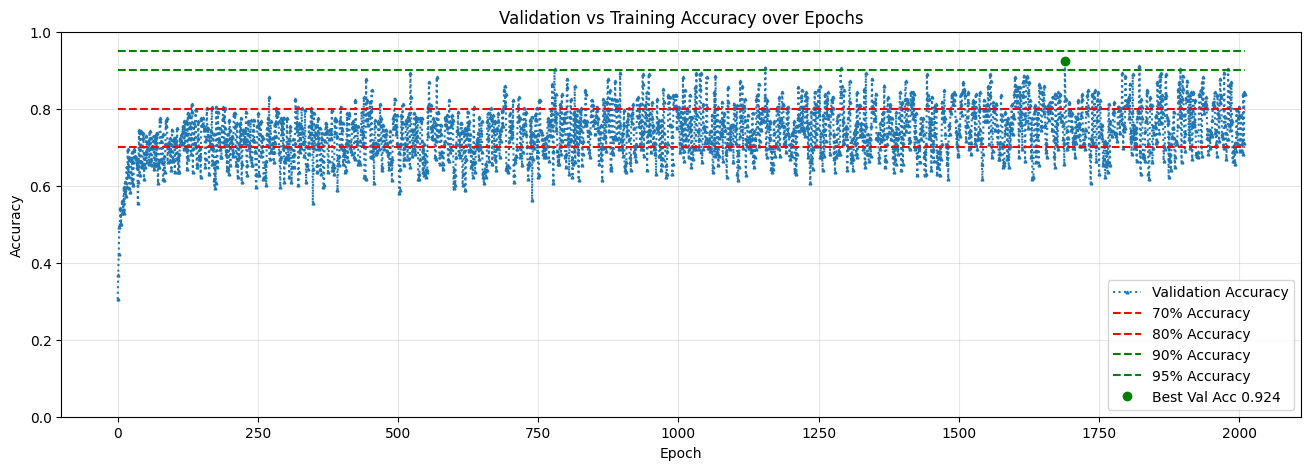


Plotting TCNModel_d32_outch128: Test Accuracy = 0.907


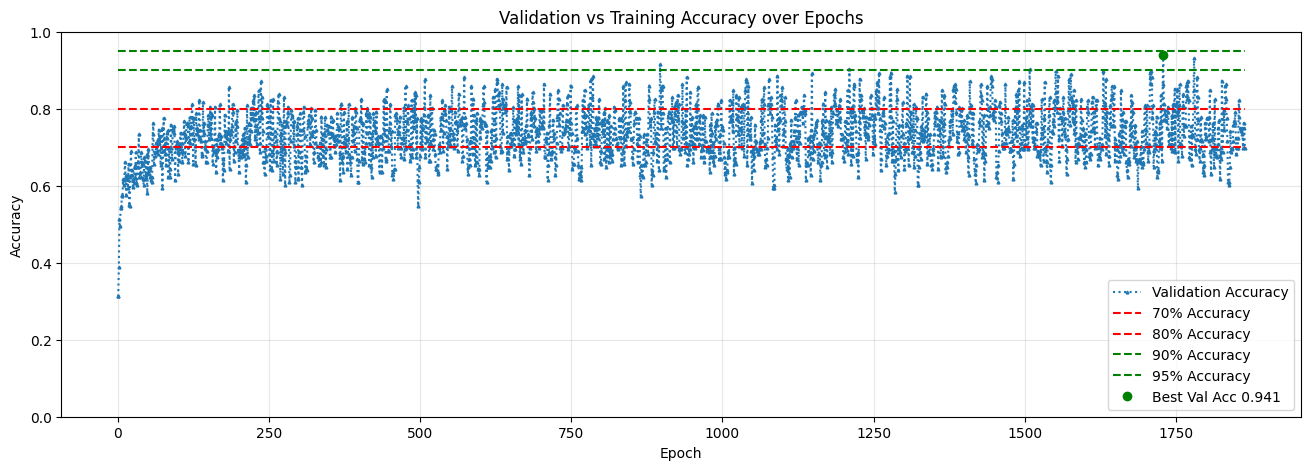

In [2]:
test_results = test_trained_models(results, test_loader)
plot_all_results(results, test_results)

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Testing TCNModel_v1_SiLU...


Testing: |          | 0/? [00:00<?, ?it/s]

Class 10.5 accuracy: 0.983
Class 12 accuracy: 0.781
Class 15.2 accuracy: 0.912
Class 18.1 accuracy: 0.862


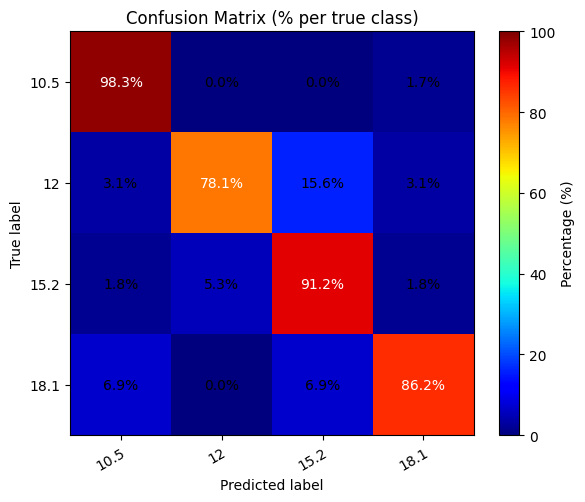

TCNModel_v1_SiLU: Test accuracy = 0.882


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Testing TCNModel_v1_LeakyReLU...


Testing: |          | 0/? [00:00<?, ?it/s]

Class 10.5 accuracy: 0.966
Class 12 accuracy: 0.922
Class 15.2 accuracy: 0.877
Class 18.1 accuracy: 0.914


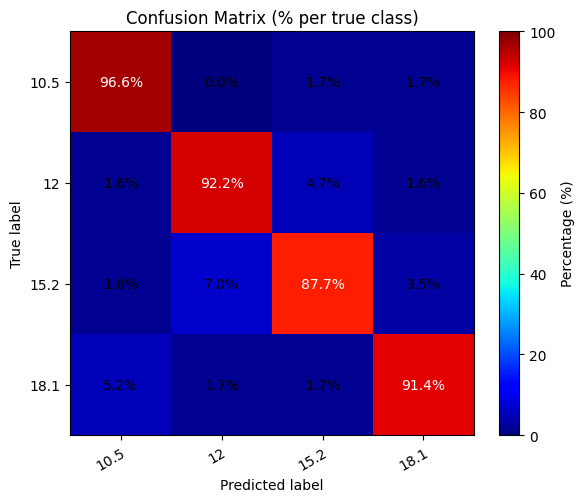

TCNModel_v1_LeakyReLU: Test accuracy = 0.920


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Testing TCNModel_v1_ELU...


Testing: |          | 0/? [00:00<?, ?it/s]

Class 10.5 accuracy: 0.983
Class 12 accuracy: 0.844
Class 15.2 accuracy: 0.842
Class 18.1 accuracy: 0.828


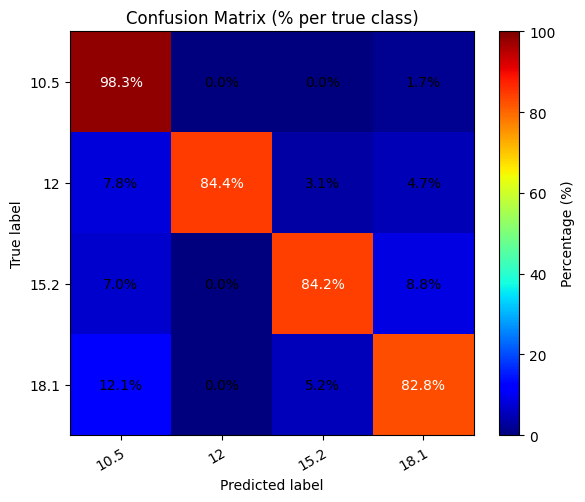

TCNModel_v1_ELU: Test accuracy = 0.873


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Testing TCNModel_v1_GELU...


Testing: |          | 0/? [00:00<?, ?it/s]

Class 10.5 accuracy: 0.983
Class 12 accuracy: 0.953
Class 15.2 accuracy: 0.825
Class 18.1 accuracy: 0.879


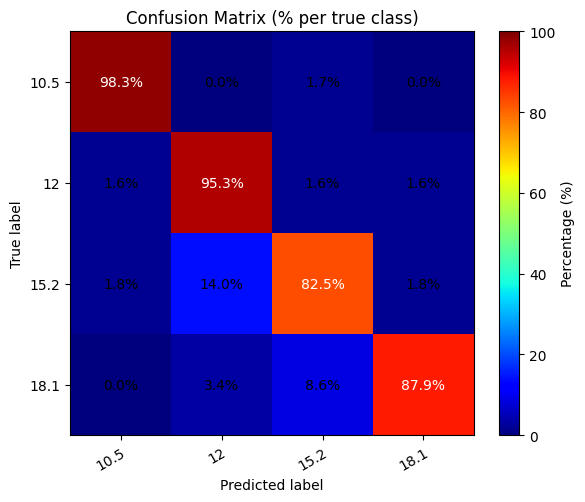

TCNModel_v1_GELU: Test accuracy = 0.911

Testing complete for all models.


Plotting TCNModel_v1_SiLU: Test Accuracy = 0.882


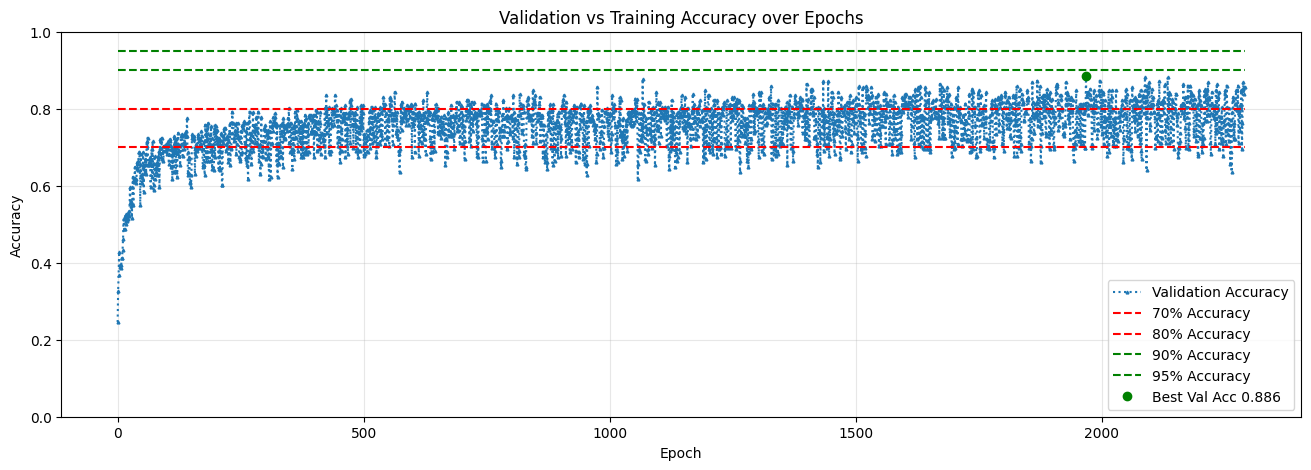


Plotting TCNModel_v1_LeakyReLU: Test Accuracy = 0.920


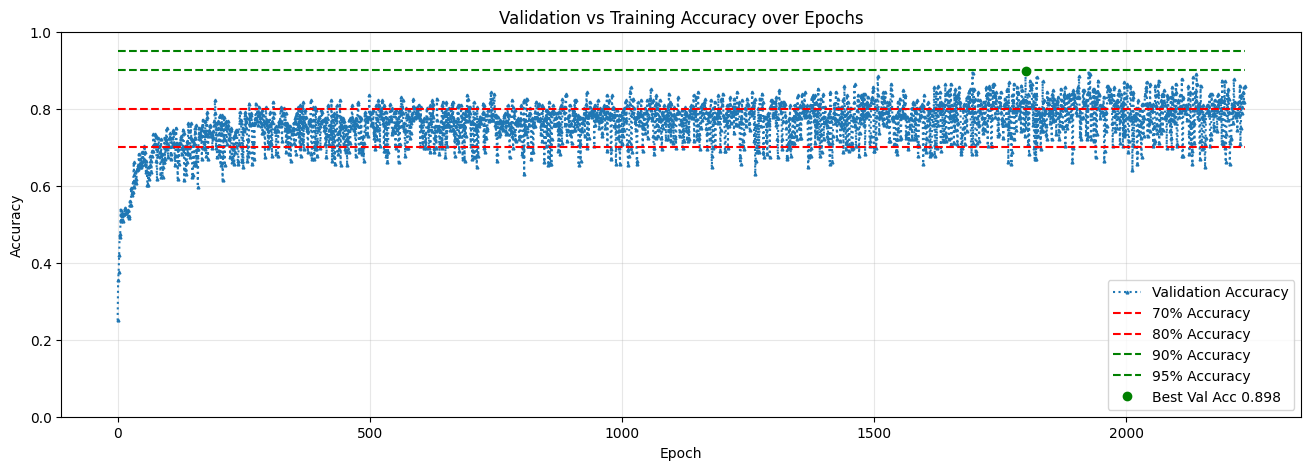


Plotting TCNModel_v1_ELU: Test Accuracy = 0.873


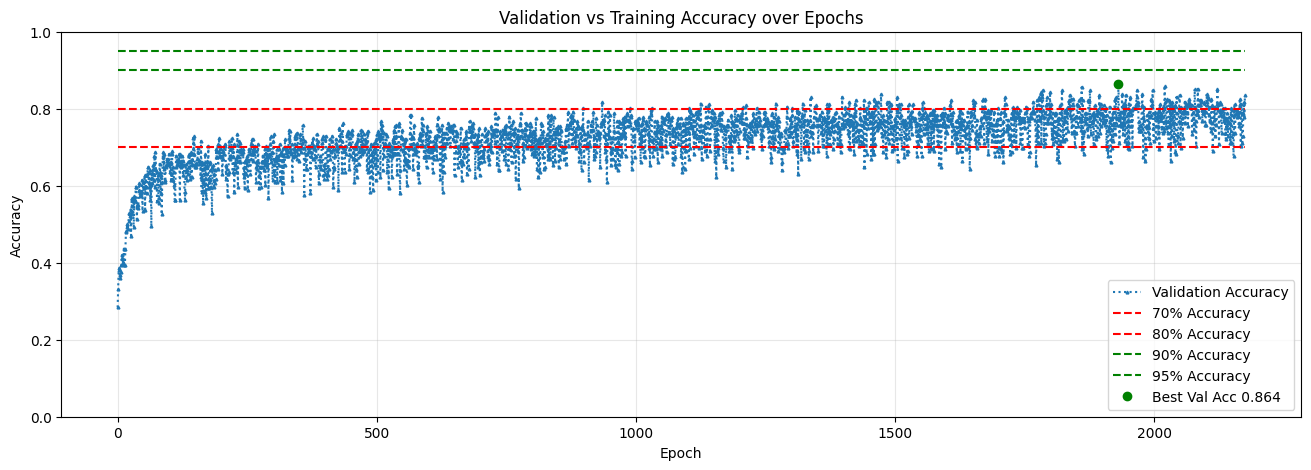


Plotting TCNModel_v1_GELU: Test Accuracy = 0.911


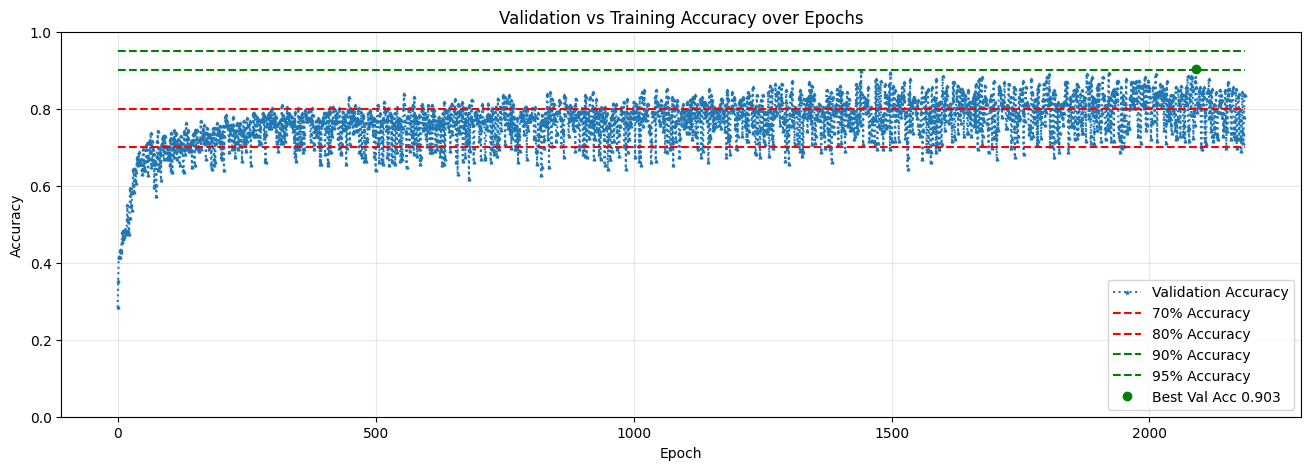

In [2]:
test_results = test_trained_models(results, test_loader)
plot_all_results(results, test_results)

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Testing TCNModel_v0...


Testing: |          | 0/? [00:00<?, ?it/s]

Class 10.5 accuracy: 0.983
Class 12 accuracy: 0.859
Class 15.2 accuracy: 0.895
Class 18.1 accuracy: 0.897


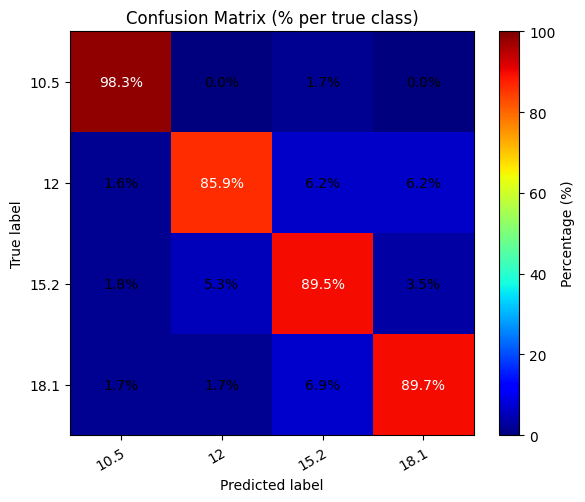

TCNModel_v0: Test accuracy = 0.907


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Testing TCNModel_v1...


Testing: |          | 0/? [00:00<?, ?it/s]

Class 10.5 accuracy: 0.983
Class 12 accuracy: 0.922
Class 15.2 accuracy: 0.947
Class 18.1 accuracy: 0.845


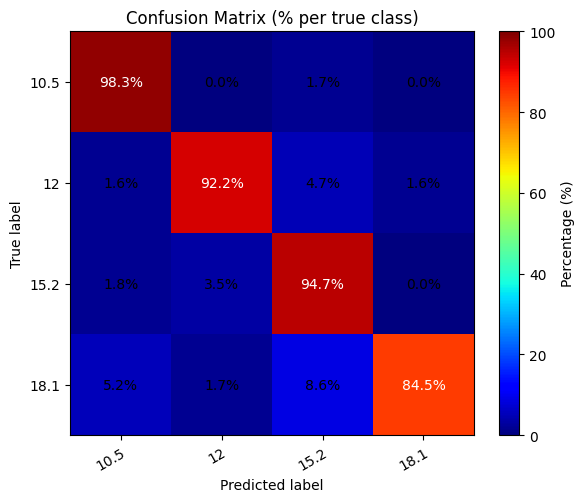

TCNModel_v1: Test accuracy = 0.924


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Testing TCNModel_v1_d16...


Testing: |          | 0/? [00:00<?, ?it/s]

Class 10.5 accuracy: 0.948
Class 12 accuracy: 0.875
Class 15.2 accuracy: 0.982
Class 18.1 accuracy: 0.845


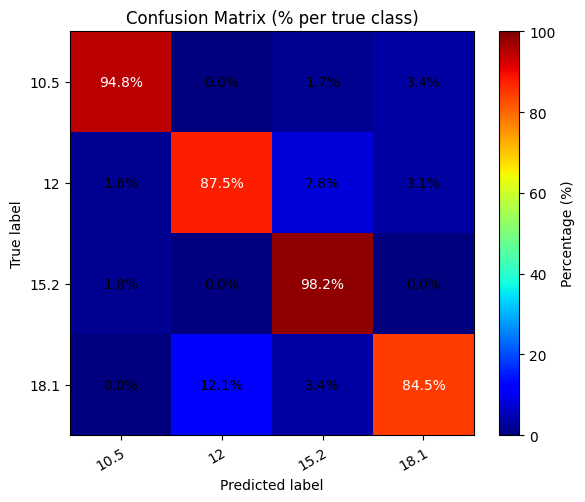

TCNModel_v1_d16: Test accuracy = 0.911


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Testing TCNModel_v1_d32...


Testing: |          | 0/? [00:00<?, ?it/s]

Class 10.5 accuracy: 0.966
Class 12 accuracy: 0.953
Class 15.2 accuracy: 0.912
Class 18.1 accuracy: 0.897


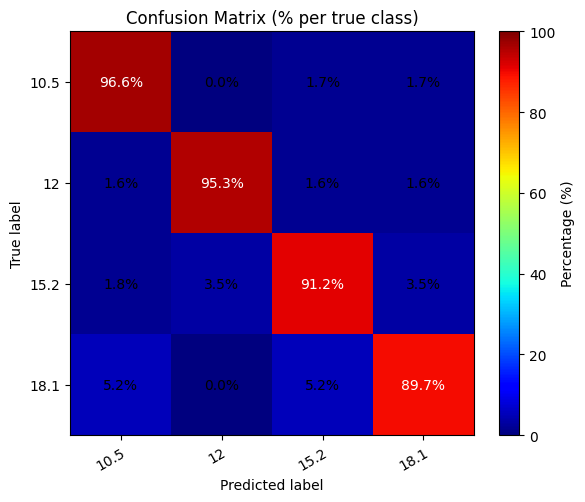

TCNModel_v1_d32: Test accuracy = 0.932


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Testing TCNModel_v1_d_repeat...


Testing: |          | 0/? [00:00<?, ?it/s]

Class 10.5 accuracy: 0.966
Class 12 accuracy: 0.891
Class 15.2 accuracy: 0.947
Class 18.1 accuracy: 0.879


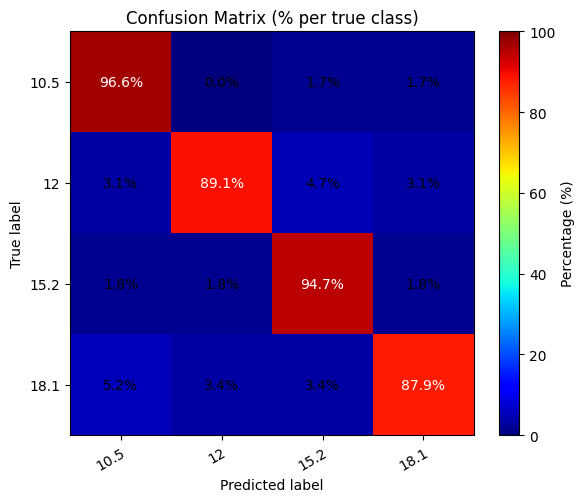

TCNModel_v1_d_repeat: Test accuracy = 0.920


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Testing TCNModel_v1_d_aggressive...


Testing: |          | 0/? [00:00<?, ?it/s]

Class 10.5 accuracy: 0.983
Class 12 accuracy: 0.906
Class 15.2 accuracy: 0.895
Class 18.1 accuracy: 0.897


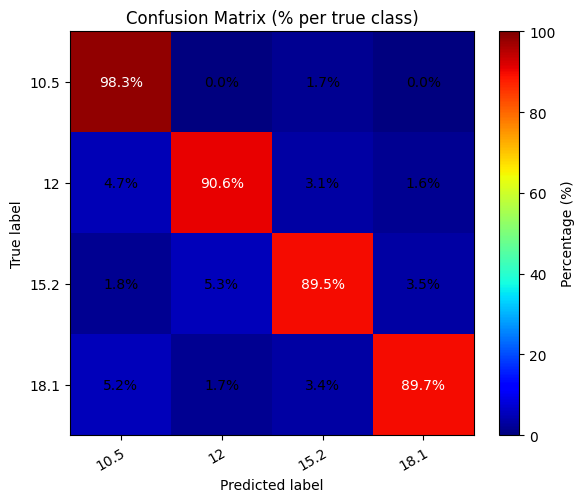

TCNModel_v1_d_aggressive: Test accuracy = 0.920


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Testing TCNModel_v1_k4...


Testing: |          | 0/? [00:00<?, ?it/s]

Class 10.5 accuracy: 0.966
Class 12 accuracy: 0.906
Class 15.2 accuracy: 0.965
Class 18.1 accuracy: 0.810


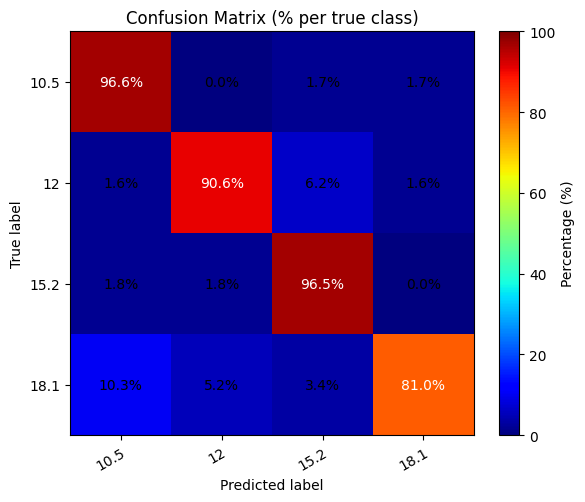

TCNModel_v1_k4: Test accuracy = 0.911


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Testing TCNModel_v1_k5...


Testing: |          | 0/? [00:00<?, ?it/s]

Class 10.5 accuracy: 0.983
Class 12 accuracy: 0.953
Class 15.2 accuracy: 0.860
Class 18.1 accuracy: 0.845


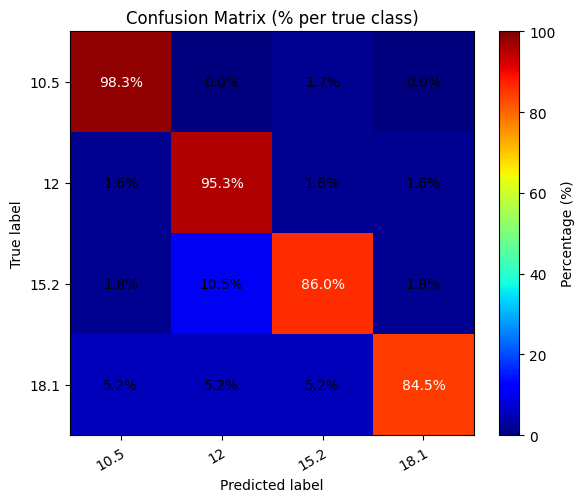

TCNModel_v1_k5: Test accuracy = 0.911

Testing complete for all models.


Plotting TCNModel_v0: Test Accuracy = 0.907


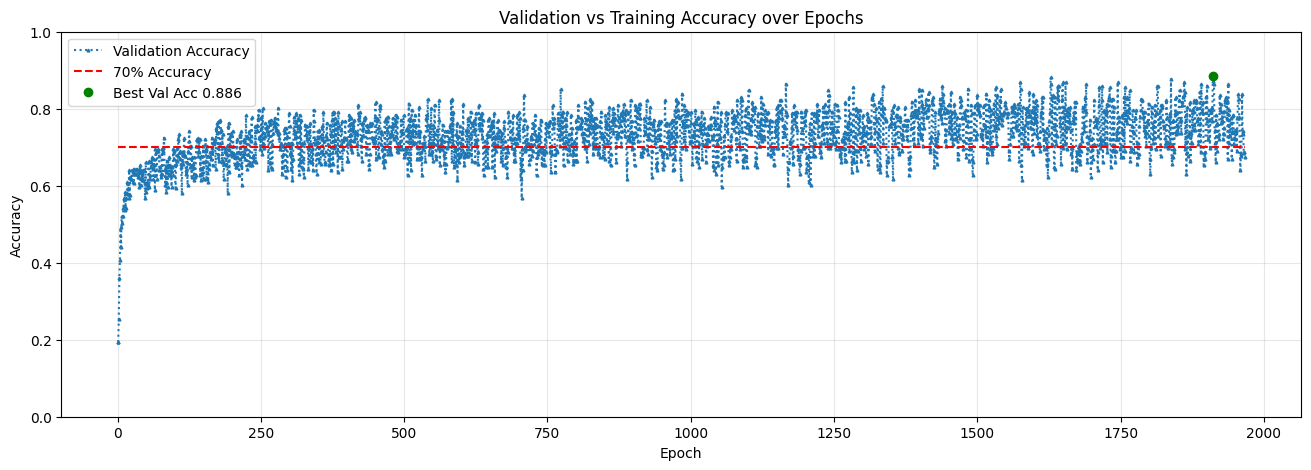


Plotting TCNModel_v1: Test Accuracy = 0.924


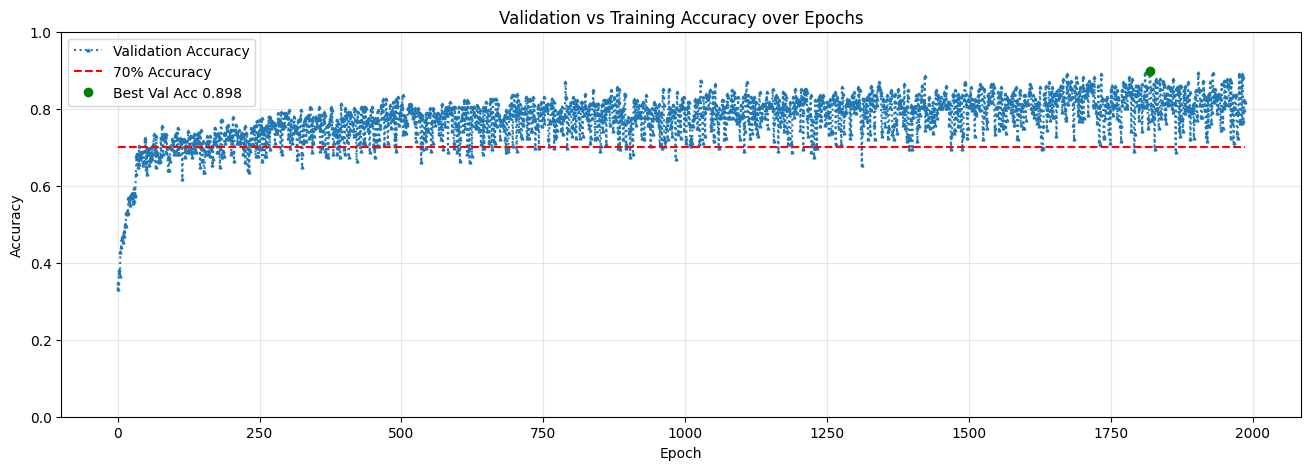


Plotting TCNModel_v1_d16: Test Accuracy = 0.911


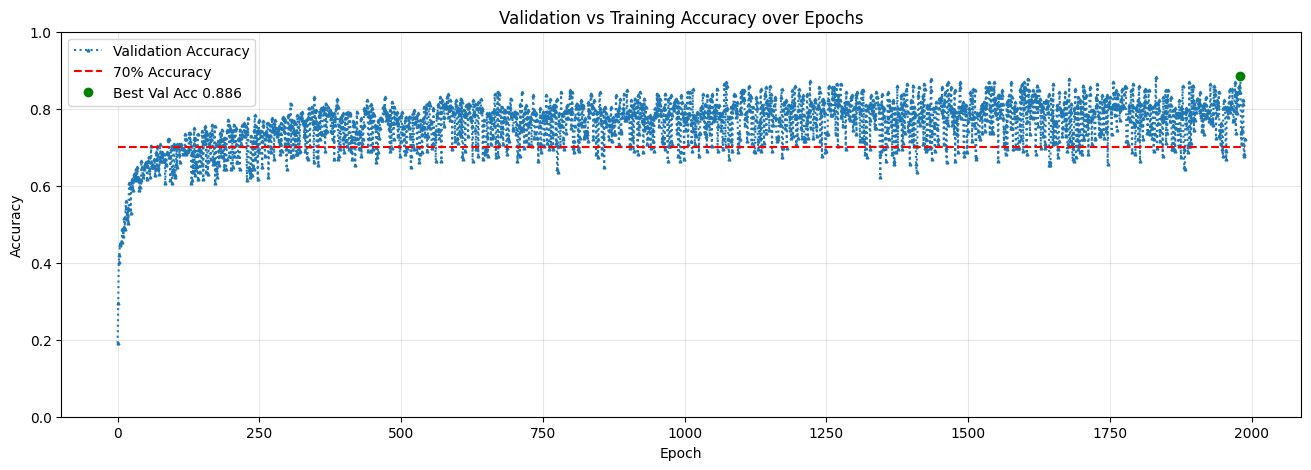


Plotting TCNModel_v1_d32: Test Accuracy = 0.932


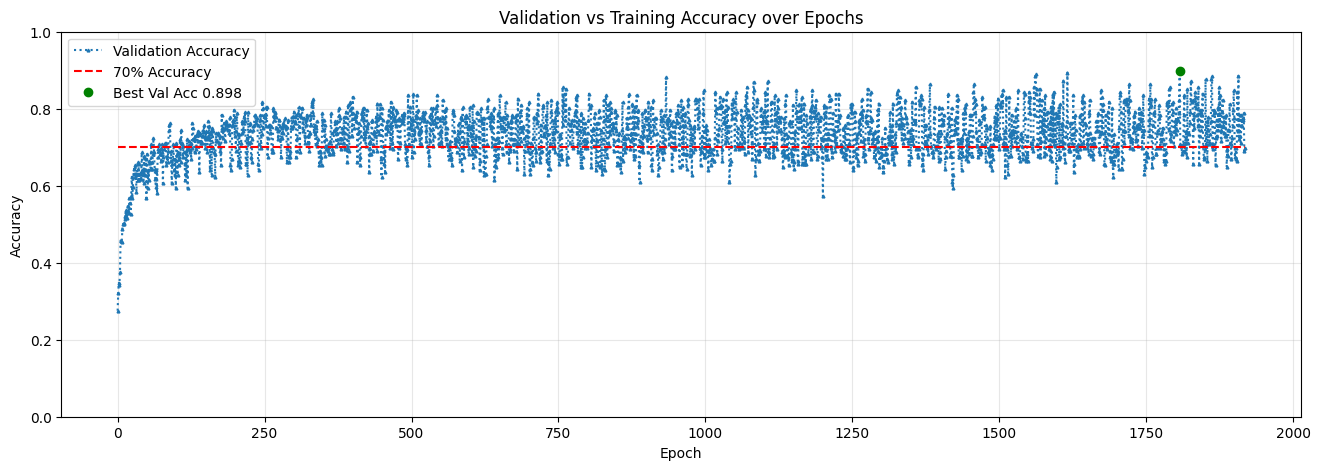


Plotting TCNModel_v1_d_repeat: Test Accuracy = 0.920


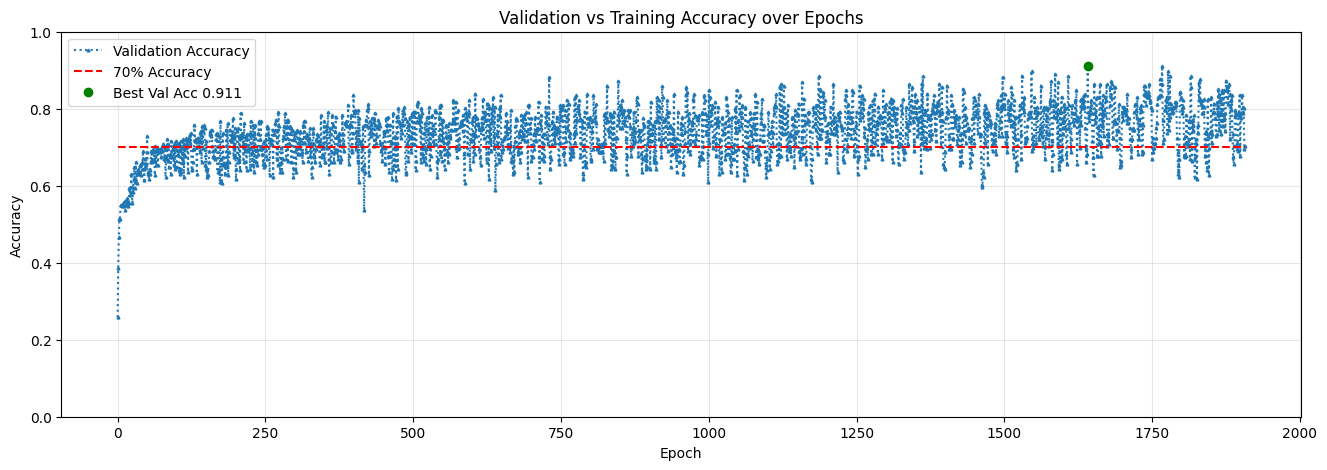


Plotting TCNModel_v1_d_aggressive: Test Accuracy = 0.920


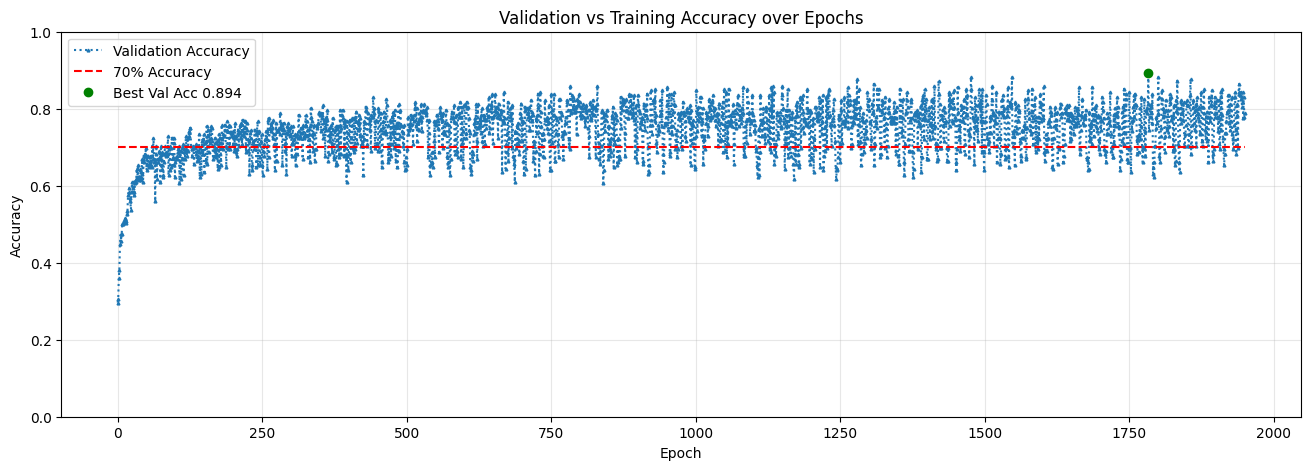


Plotting TCNModel_v1_k4: Test Accuracy = 0.911


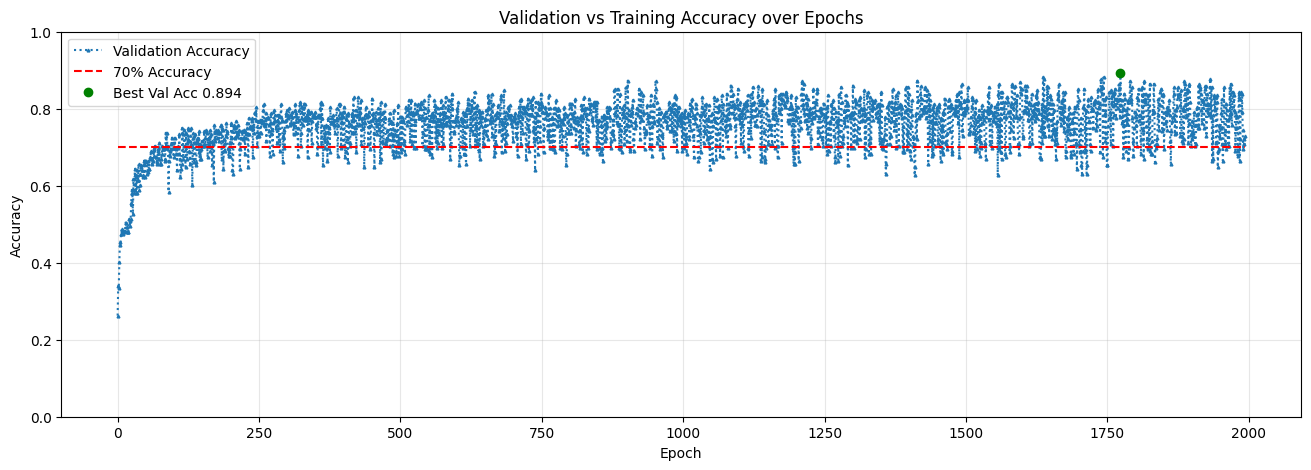


Plotting TCNModel_v1_k5: Test Accuracy = 0.911


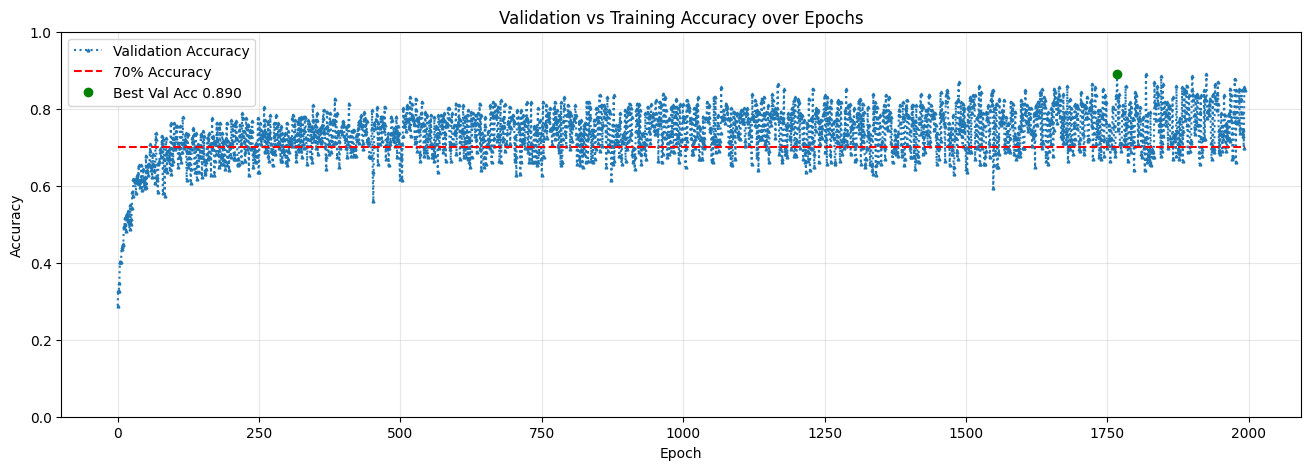

In [4]:
test_results = test_trained_models(results, test_loader)
plot_all_results(results, test_results)

## Training on the side 

Loading data from: datasets/numpy/ssvep_5_nofilter_GMCGA_no1_5labels_250hz_1.5_window_size_0.4keepratio.npz
Data loaded: X=(2718, 8, 375), y=(2718,)


Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type                      | Params | Mode 
----------------------------------------------------------------
0 | train_acc | MulticlassAccuracy        | 0      | train
1 | val_acc   | MulticlassAccuracy        | 0      | train
2 | test_acc  | MulticlassAccuracy        | 0      | train
3 | test_cm   | MulticlassConfusionMatrix | 0      | train
4 | tcn       | Sequential                | 10.4 K | train
5 | head      | Linear                    | 165    | train
----------------------------------------------------------------
10.5 K    Trainable params
0         Non-trainable params
10.5 K    Total params
0.042     Total estimated model params size (MB)
18        Modules in train mode
0         Modules in eval mode


Dataset split: Train=1902, Val=407, Test=409
Dataloaders ready

Processing  TCNModel_withBase...

Training TCNModel_withBase...



Time limit reached. Elapsed time is 1:00:00. Signaling Trainer to stop.


Best model saved at: logs/TCNModel_withBase/version_54/checkpoints/best-11473-val_acc=0.865.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Class 0 accuracy: 0.779
Class 10.5 accuracy: 0.922
Class 12 accuracy: 0.800
Class 15.2 accuracy: 0.863
Class 18.1 accuracy: 0.873


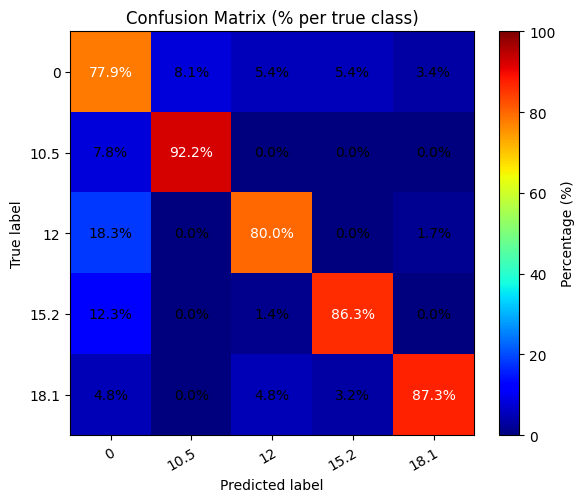

TCNModel_withBase: Test accuracy = 0.834

Plotting TCNModel_withBase: Test Accuracy = 0.834


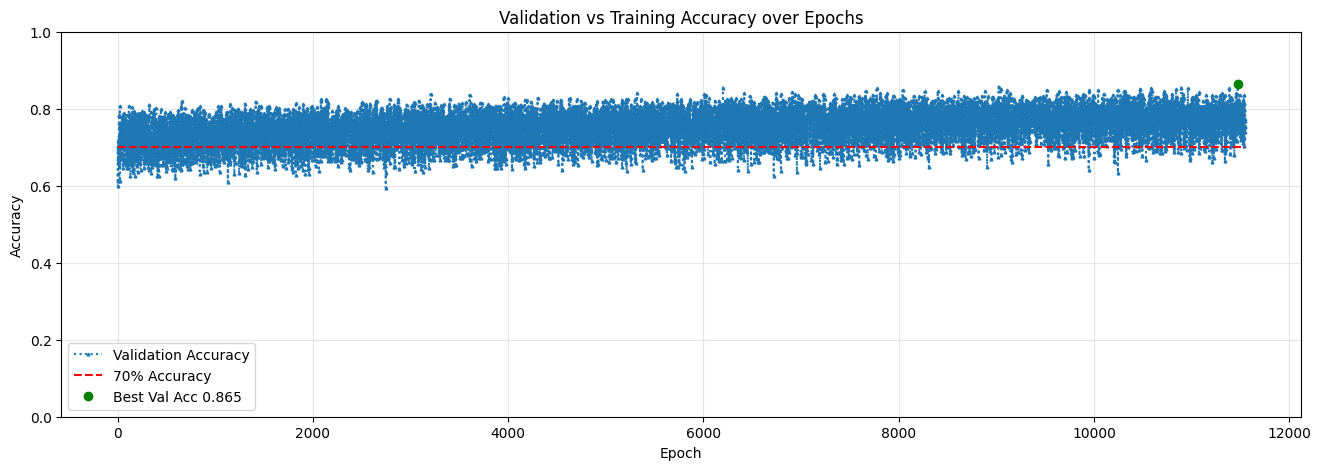


All models processed successfully!



In [4]:
from Model_Trainer import test_trained_models, run_multiple_models
from Utils import plot_all_results
import Models_1D
from Dataset_torch import EEGDataset_with_filters

models = [
    Models_1D.TCNModel_withBase, 
]

shared_parameters_ssvep = {
    "data_path": "datasets/numpy/ssvep_5_nofilter_GMCGA_no1_5labels_250hz_1.5_window_size_0.4keepratio.npz",  
    
    "DATASET_CLASS": EEGDataset_with_filters,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": slice(0, 8), 
    
    "MAX_TIME": "00:01:00:00",
    "MODEL_KWARGS": {
        "in_channels": 8, 
        
        "num_classes": 5,
        "class_labels": [0, 10.5, 12, 15.2, 18.1],
        "class_weights": [1.0, 1.0, 1.0, 1.0, 1.0], 
    },
    
    # "skip_training": True,
    "LOAD_CHECKPOINT": "logs/TCNModel_withBase/version_41_5_retrained_best/checkpoints/best-00-val_acc=0.813.ckpt", 
}
results, test_loader = run_multiple_models(models, shared_parameters_ssvep)

Loading data from: datasets/numpy/ssvep_10_nofilter_GMCGAGG_10labels_250hz_1.5_window_size.npz
Data loaded: X=(2746, 8, 375), y=(2746,)


Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Dataset split: Train=1922, Val=411, Test=413
Dataloaders ready

Processing  TCNModel_withBase...

Training TCNModel_withBase...



You are using a CUDA device ('NVIDIA GeForce RTX 3060') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type                      | Params | Mode 
----------------------------------------------------------------
0 | train_acc | MulticlassAccuracy        | 0      | train
1 | val_acc   | MulticlassAccuracy        | 0      | train
2 | test_acc  | MulticlassAccuracy        | 0      | train
3 | test_cm   | MulticlassConfusionMatrix | 0      | train
4 | tcn       | Sequential                | 10.4 K | train
5 | head      | Linear                    | 330    | train
----------------------------------------------------------------
10.7 K    Trainable params
0         Non-trainable

Best model saved at: logs/TCNModel_withBase/version_59/checkpoints/best-3056-val_acc=0.910.ckpt
Class 5 accuracy: 0.500
Class 7 accuracy: 0.982
Class 8.6 accuracy: 0.652
Class 10.5 accuracy: 0.969
Class 11 accuracy: 0.680
Class 12 accuracy: 0.810
Class 13.4 accuracy: 1.000
Class 15.2 accuracy: 0.895
Class 17 accuracy: 0.960
Class 18.1 accuracy: 0.907


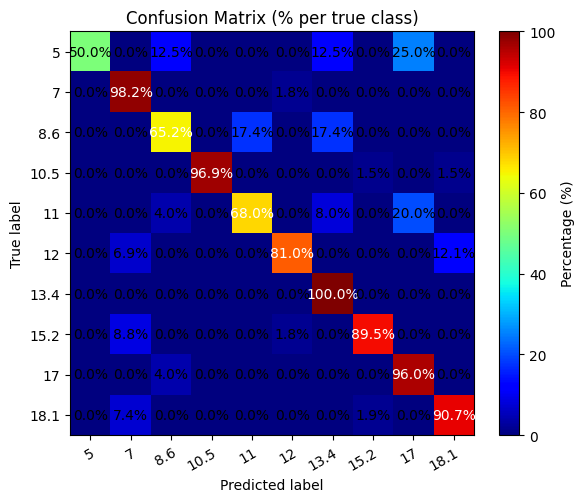

TCNModel_withBase: Test accuracy = 0.860

Plotting TCNModel_withBase: Test Accuracy = 0.860


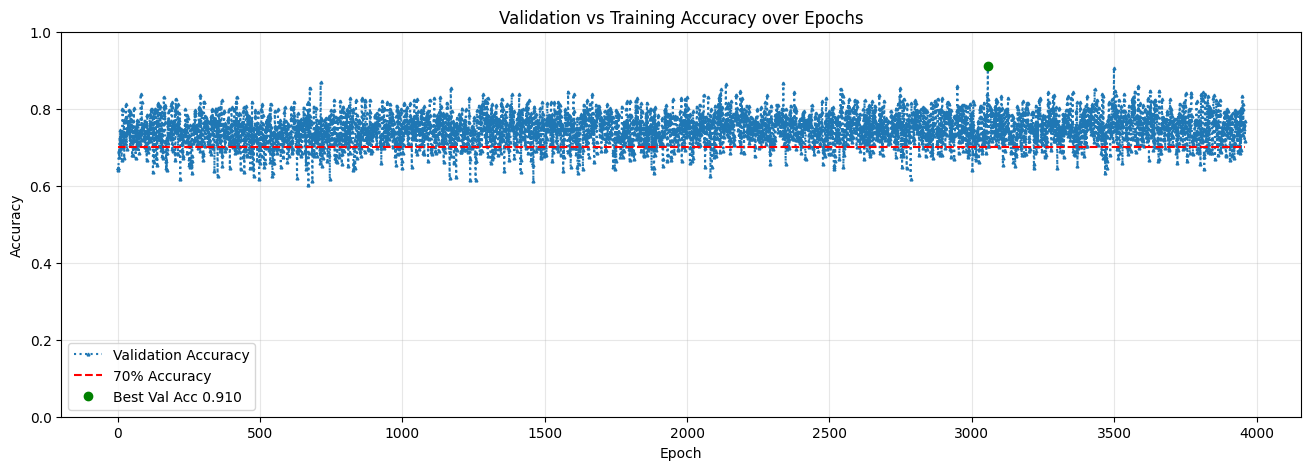


All models processed successfully!



In [1]:
from Model_Trainer import test_trained_models, run_multiple_models
from Utils import plot_all_results
import Models_1D
from Dataset_torch import EEGDataset_with_filters

models = [
    Models_1D.TCNModel_withBase, 
]

shared_parameters_ssvep = {
    "data_path": "datasets/numpy/ssvep_10_nofilter_GMCGAGG_10labels_250hz_1.5_window_size.npz",  
    
    "DATASET_CLASS": EEGDataset_with_filters,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": slice(0, 8), 
    
    "MAX_TIME": "00:00:20:00",
    "MODEL_KWARGS": {
        "in_channels": 8, 
        "num_classes": 10,
        "class_labels": [5, 7, 8.6, 10.5, 11, 12, 13.4, 15.2, 17, 18.1],
        # "class_weights": [1.0, 1.0, 1.5, 1.0, 1.5, 1.0, 1.0, 1.0, 1.5, 1.0],
        "class_weights": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 
         
    },
    
    # "skip_training": True,
    "LOAD_CHECKPOINT": "logs/TCNModel_withBase/version_52_10_most_balanced_and_best/checkpoints/best-4880-val_acc=0.886.ckpt",   # most balanced and best label 10
}
results, test_loader = run_multiple_models(models, shared_parameters_ssvep)

## Training on PhysioNet data (imaginary motor movement)

Loading data from: datasets/numpy_testing/processed_eeg_data_3_7_11_v2_SMALL5.npz
Data loaded: X=(473, 64, 480), y=(473,)


Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Dataset split: Train=331, Val=70, Test=72
Dataloaders ready

Processing  TCNModel_withBase...

Training TCNModel_withBase...



You are using a CUDA device ('NVIDIA GeForce RTX 3060') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type                      | Params | Mode 
----------------------------------------------------------------
0 | train_acc | MulticlassAccuracy        | 0      | train
1 | val_acc   | MulticlassAccuracy        | 0      | train
2 | test_acc  | MulticlassAccuracy        | 0      | train
3 | test_cm   | MulticlassConfusionMatrix | 0      | train
4 | tcn       | Sequential                | 15.7 K | train
5 | head      | Linear                    | 99     | train
----------------------------------------------------------------
15.8 K    Trainable params
0         Non-trainable

Best model saved at: logs/TCNModel_withBase/version_57/checkpoints/best-4361-val_acc=0.643.ckpt
Class relaxed accuracy: 0.703
Class left_fist accuracy: 0.286
Class right_fist accuracy: 0.143


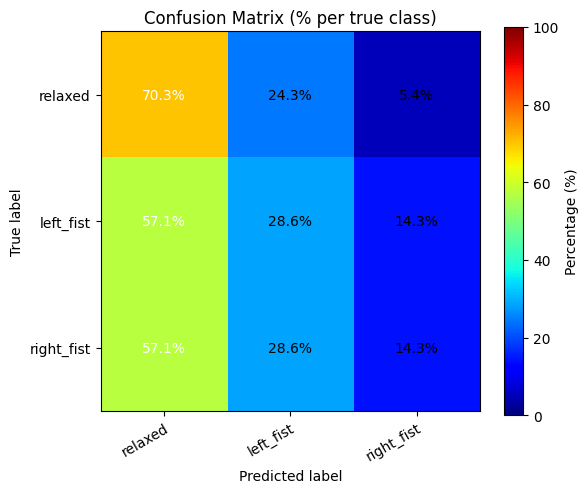

TCNModel_withBase: Test accuracy = 0.458

Plotting TCNModel_withBase: Test Accuracy = 0.458


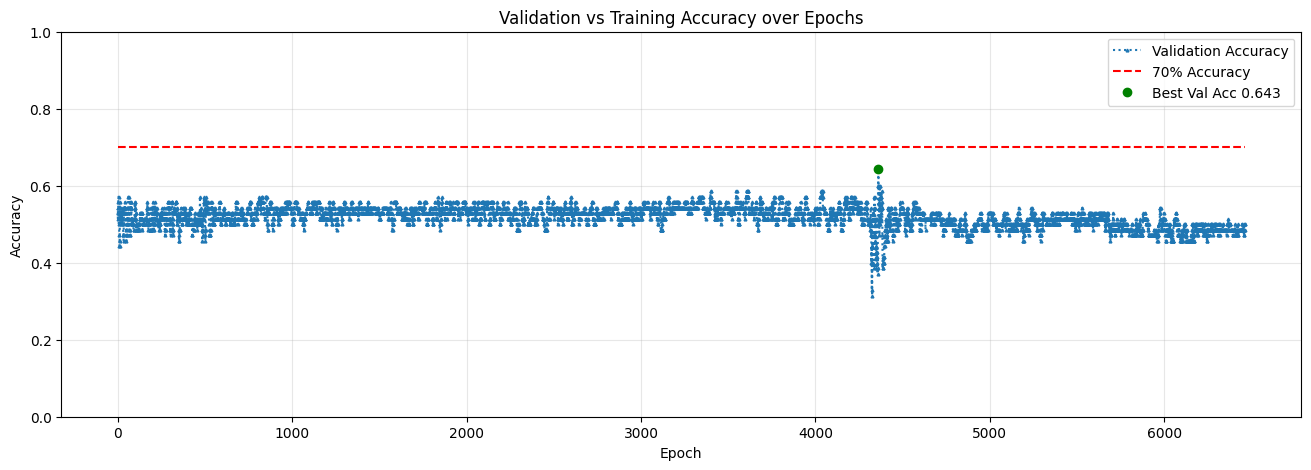


All models processed successfully!



In [1]:

from Model_Trainer import test_trained_models, run_multiple_models
from Utils import plot_all_results
import Models_1D
from Dataset_torch import EEGDataset_with_filters

models = [
    Models_1D.TCNModel_withBase, 
]

shared_parameters_ssvep = {
    "data_path": "datasets/numpy_testing/processed_eeg_data_3_7_11_v2_SMALL5.npz",  # about 10 subjects  
    
    "DATASET_CLASS": EEGDataset_with_filters,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": slice(0, 64), 
    "BATCH_SIZE": 256,
    "NUM_WORKERS": 4,
    "PREFETCH_FACTOR": 2,
    
    "MAX_TIME": "00:00:30:00",
    "MODEL_KWARGS": {
        "in_channels": 64, 
        "num_classes": 3,
        "class_labels": ["relaxed", "left_fist", "right_fist"],
        "class_weights": [1.0, 1.3, 1.3],
    },
    
    # "skip_training": True,
    "LOAD_CHECKPOINT": "logs/TCNModel_withBase/version_56_fist/checkpoints/best-153-val_acc=0.586.ckpt", 
}  
results, test_loader = run_multiple_models(models, shared_parameters_ssvep)

## Trying Melspetrogram with 2D CNN

In [ ]:
from Model_Trainer import run_multiple_models, test_trained_models 
from Dataset_torch import EEGDataset, EEGDataset_mel, EEGDataset_mel_with_filters
from Utils import plot_all_results
import Models_2D

models = [
    # Models_2D.EEGClassifier_mel,             # 0.69 on 2mins, 0.73 on 5mins
    # Models_2D.EEGClassifier_mel_with_res,    # 0.73 on 5mins
    # Models_2D.EEGClassifier_mel_small,       # 0.70 on 2mins
    Models_2D.EEGNet_for_mel
]

shared_parameters_ssvep = {
    # "data_path": "datasets/numpy_testing/ssvep_5_filter.npz",
    # "data_path": "datasets/numpy/ssvep_5_nofilter_GMCGA.npz",
    # "data_path": "datasets/numpy/ssvep_5_nofilter_GMCGA_no0.npz",
    "data_path": "datasets/numpy/ssvep_5_nofilter_GMCGA_no01_4labels.npz",
    
    "DATASET_CLASS" : EEGDataset_mel_with_filters,
    
    "OCCIPITAL_SLICE": slice(0, 8), 
    "MAX_TIME": "00:00:02:00",
    "MODEL_KWARGS": {
        "in_channels": 8, 
        "num_classes": 4,
        "LR": 1e-3, 
        "WEIGHT_DECAY": 0.0,   
        "class_labels": [10.5, 12, 15.2, 18.1],
    }
}

results, test_loader = run_multiple_models(models, shared_parameters_ssvep)

In [ ]:
test_results = test_trained_models(results, test_loader)
plot_all_results(results, test_results)

## Training on eyes open closed data

In [ ]:
from Model_Trainer import run_multiple_models, test_trained_models 
from Utils import plot_all_results
from Dataset_torch import EEGDataset_with_filters
import Models_1D
import Random_models

models_ = [
    Models_1D.EEGClassifier,  # with notch on 2mins: 0., test: 0., on 15mins: 0. test: 0.
    ]

models = [
    Random_models.TCNModel_withBase,           # with notch on 2mins: 0.806, test: 0., on 15mins: 0.
]

shared_parameters_eyes = {
    # "data_path": "datasets/numpy/eyes_filter.npz",
    "data_path": "datasets/numpy/processed_eeg_data_eyes.npz",
    
    "DATASET_CLASS": EEGDataset_with_filters,
    
    "NOTCH_50": True,         
    "OCCIPITAL_SLICE": slice(0, 64), 
    "BATCH_SIZE": 256,
    
    "MAX_TIME": "00:00:02:00",
    "MODEL_KWARGS": {
        "in_channels": 64, 
        "num_classes": 2,
        "LR": 1e-3, 
        "WEIGHT_DECAY": 0.0,  
        "class_labels": [0, 1],
    }
}
results, test_loader = run_multiple_models(models, shared_parameters_eyes)

In [ ]:
test_results = test_trained_models(results, test_loader)
plot_all_results(results, test_results)

## Plot any saved model 

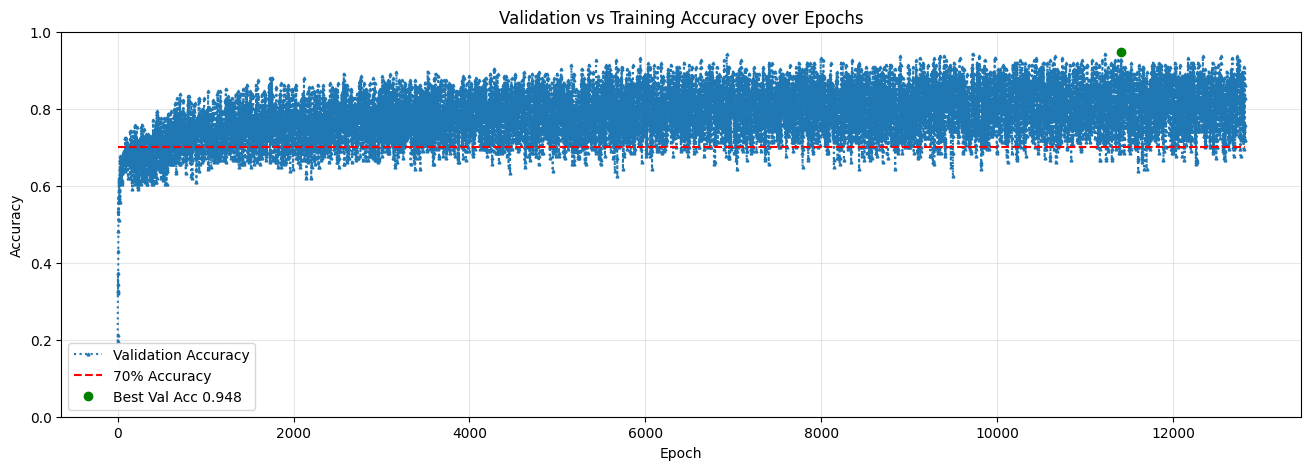

In [3]:
from Utils import plot_training_metrics

csv_path = "logs/TCNModel_withBase/version_12_4_best_1h_GMCGA_no01_4labels/metrics.csv"
plot_training_metrics(csv_path)